<a href="https://colab.research.google.com/github/HWANG-HOE-SUN/Univ.Project/blob/main/%EB%8C%80%ED%95%99%EC%9E%90%EB%A3%8C%EB%B6%84%EC%84%9D/%EC%A7%80%ED%91%9C%EC%9E%90%EB%8F%99%EC%8B%9C%EA%B0%81%ED%99%94(22_02_18).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [1]:
pip install missingno

### 라이브러리 불러오기 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
import matplotlib.font_manager as fm
import numpy as np

In [3]:
plt.rc('font', family='NanumBarunGothic')  # 코랩

In [ ]:
sns.set(font="NanumBarunGothic", 
        style='whitegrid', rc={"grid.linewidth": 0.1,"axes.unicode_minus":False})

### 데이터 불러오기 

In [5]:
def 컬럼전처리(df,excel):
    if excel=='내신등급':
      df.columns = df.iloc[0]
      df.drop(0,inplace=True)
      newcol = list(df.columns[0:4])
      for i in range(4,10):
          if i<7:
              newcol.append('평균 내신 등급' + f' {2015+i}')
          else:
              newcol.append('70% 컷 내신등급' + f' {2012+i}')
      newcol.append('비고')
      df.columns = newcol
    
    if excel=='백분위점수':
      df.columns = df.iloc[0]
      df.drop(0,inplace=True)
      newcol = list(df.columns[0:4])
      for i in range(4,10):
          if i<7:
              newcol.append('평균 백분위점수' + f' {2015+i}')
          else:
              newcol.append('70% 컷 백분위점수' + f' {2012+i}')
      newcol.append('비고')
      df.columns = newcol
    
    if excel=='재학생':
      df.drop(0,inplace=True)
      newcol = list(df.columns[0:4])
      for i in range(4,10):
          if i<7:
              newcol.append('재적학생수' + f' {2015+i}')
          else:
              newcol.append('탈락률' + f' {2012+i}')
      newcol.append('비고')
      df.columns = newcol
    return df

> 신입생 경쟁률

> 신입생 충원률 

In [72]:
# path = 'E:/학습/학부연구생/교수님알바/Data/통합(+전남대)/'
path = '/content/'
신입생_경쟁률_충원률 = pd.read_excel(path+'신입생_경쟁률_충원률.xlsx')
for i in [4,7]:
    for j in range(1,3):
        신입생_경쟁률_충원률.rename(columns={신입생_경쟁률_충원률.columns[i+j]:신입생_경쟁률_충원률.columns[i] + ' ' + f'{2018+j}'},inplace=True)
    신입생_경쟁률_충원률.rename(columns={신입생_경쟁률_충원률.columns[i]:신입생_경쟁률_충원률.columns[i] + ' 2018'},inplace=True)
print(list(신입생_경쟁률_충원률)) # 칼럼 이름 변경
신입생_경쟁률_충원률.drop(0,inplace=True)
신입생_경쟁률_충원률 = 신입생_경쟁률_충원률.iloc[:,:-1]
신입생_경쟁률_충원률.head(2)

['설립구분', '지역', '학교', '학과', '입학경쟁률 2018', '입학경쟁률 2019', '입학경쟁률 2020', '신입생충원율 2018', '신입생충원율 2019', '신입생충원율 2020', 'Unnamed: 10']


,설립구분,지역,학교,학과,입학경쟁률 2018,입학경쟁률 2019,입학경쟁률 2020,신입생충원율 2018,신입생충원율 2019,신입생충원율 2020
1,사립,수도권,가천대학교,산업경영공학과,14.4,12.9,11.2,100,100,100
2,사립,수도권,가천대학교,기계공학과,20.9,14.3,14.4,100,100,100


> 졸업생 진학률 취업률 

In [73]:
path = '/content/'
졸업생_진학률_취업률 = pd.read_excel(path+'졸업생_진학률_취업률.xlsx')
for i in [4,7]:
    for j in range(1,3):
        졸업생_진학률_취업률.rename(columns={졸업생_진학률_취업률.columns[i+j]:졸업생_진학률_취업률.columns[i] + ' ' + f'{2018+j}'},inplace=True)
    졸업생_진학률_취업률.rename(columns={졸업생_진학률_취업률.columns[i]:졸업생_진학률_취업률.columns[i] + ' 2018'},inplace=True)
print(list(졸업생_진학률_취업률)) # 칼럼 이름 변경
졸업생_진학률_취업률.drop(0,inplace=True)
졸업생_진학률_취업률.head(2)

['설립구분', '지역', '학교', '학과', '취업률 2018', '취업률 2019', '취업률 2020', '진학률 2018', '진학률 2019', '진학률 2020']


,설립구분,지역,학교,학과,취업률 2018,취업률 2019,취업률 2020,진학률 2018,진학률 2019,진학률 2020
1,사립,수도권,가천대학교,산업경영공학과,67.8,62.2,67.8,1.7,3.2,5.9
2,사립,수도권,가천대학교,기계공학과,68.9,65.0,70.1,8.2,5.8,14.1


> 연구 논문실적 수혜실적

In [74]:
path = '/content/'
연구_논문실적_수혜실적 = pd.read_excel(path+'연구_논문실적_수혜실적.xlsx')
for i in [4,7]:
    for j in range(1,3):
        연구_논문실적_수혜실적.rename(columns={연구_논문실적_수혜실적.columns[i+j]:연구_논문실적_수혜실적.columns[i] + ' ' + f'{2018+j}'},inplace=True)
    연구_논문실적_수혜실적.rename(columns={연구_논문실적_수혜실적.columns[i]:연구_논문실적_수혜실적.columns[i] + ' 2018'},inplace=True)
print(list(연구_논문실적_수혜실적)) # 칼럼 이름 변경
연구_논문실적_수혜실적.drop(0,inplace=True)
연구_논문실적_수혜실적.head(2)

['설립구분', '지역', '학교', '학과', '전임교원 1인당 논문실적 2018', '전임교원 1인당 논문실적 2019', '전임교원 1인당 논문실적 2020', '전임교원 1인당 연구비 수혜실적(단위:천원) 2018', '전임교원 1인당 연구비 수혜실적(단위:천원) 2019', '전임교원 1인당 연구비 수혜실적(단위:천원) 2020']


,설립구분,지역,학교,학과,전임교원 1인당 논문실적 2018,전임교원 1인당 논문실적 2019,전임교원 1인당 논문실적 2020,전임교원 1인당 연구비 수혜실적(단위:천원) 2018,전임교원 1인당 연구비 수혜실적(단위:천원) 2019,전임교원 1인당 연구비 수혜실적(단위:천원) 2020
1,사립,수도권,가천대학교,산업경영공학과,0.519050,0.727087,0.854743,20937.500000,25050.7500,8571.428571
2,사립,수도권,가천대학교,기계공학과,0.988508,0.621881,0.695145,93723.846154,95466.0625,108862.181818


> 수시 학생부교과 내신등급

In [75]:
산업공학_내신등급 = pd.read_excel(path+'입학_수시_학생부교과_내신등급.xlsx',sheet_name='산업공학')
산업공학_내신등급 = 컬럼전처리(산업공학_내신등급,"내신등급")
산업공학_내신등급.head(2)

,설립구분,지역,학교,학과,평균 내신 등급 2019,평균 내신 등급 2020,평균 내신 등급 2021,70% 컷 내신등급 2019,70% 컷 내신등급 2020,70% 컷 내신등급 2021,비고
1,사립,수도권,가천대학교,산업경영공학과,NaN,NaN,NaN,2.4,2.7,2.7,학생부교과
2,국공립,중부권,강릉원주대학교_제2캠퍼스,산업경영공학과,5.02,4.81,4.98,NaN,NaN,NaN,학생부교과


In [76]:
a = pd.read_excel(path+'입학_수시_학생부교과_내신등급.xlsx', sheet_name = None)
print(list(a.keys())[6:9]) # 엑셀 시트 학교명
전체내신등급 = pd.DataFrame()
for i in list(a.keys())[6:]:
    전체내신등급 = pd.concat([전체내신등급,컬럼전처리(a[i],'내신등급')],axis=0,ignore_index=True)
전체내신등급.head(2)

['가천대학교', '강릉원주대학교_제2캠퍼스', '건국대학교']


,설립구분,지역,학교,학과,평균 내신 등급 2019,평균 내신 등급 2020,평균 내신 등급 2021,70% 컷 내신등급 2019,70% 컷 내신등급 2020,70% 컷 내신등급 2021,비고
0,사립,수도권,가천대학교,산업경영공학과,NaN,NaN,NaN,2.4,2.7,2.7,학생부교과
1,사립,수도권,가천대학교,기계공학과,NaN,NaN,NaN,2.2,2.6,2.5,NaN


In [77]:
# 졸업생_진학률_취업률 = 컬럼전처리(졸업생_진학률_취업률)
# 산업공학_내신등급.head(2)

> 정시 백분위 점수 

In [78]:
b = pd.read_excel(path+'입학_정시_백분위점수.xlsx', sheet_name = None)
print(list(b.keys())[6:9]) # 엑셀 시트 학교명
전체정시점수 = pd.DataFrame()
for i in list(b.keys())[6:]:
    전체정시점수 = pd.concat([전체정시점수,컬럼전처리(b[i],'백분위점수')],axis=0,ignore_index=True)

# 백분위 점수가 아닌, 정시 등급컷으로 나온 항목들은 np.nan 처리 
for i in [4,5,6,7,8,9]:
    전체정시점수.iloc[:,i] = 전체정시점수.iloc[:,i].apply(lambda x: np.nan if x<10 else x) 

전체정시점수.head(2)

['가천대학교', '강릉원주대학교_제2캠퍼스', '건국대학교']


,설립구분,지역,학교,학과,평균 백분위점수 2019,평균 백분위점수 2020,평균 백분위점수 2021,70% 컷 백분위점수 2019,70% 컷 백분위점수 2020,70% 컷 백분위점수 2021,비고
0,사립,수도권,가천대학교,산업경영공학과,NaN,NaN,NaN,88.25,86.351667,81.3,일반
1,사립,수도권,가천대학교,기계공학과,NaN,NaN,NaN,86.62,84.903520,82.0,NaN


> 재적학생현황

In [79]:
c = pd.read_excel(path+'재학생_재적학생수_탈락률.xlsx')
재적학생현황 = pd.DataFrame()
재적학생현황 = 컬럼전처리(c,'재학생')
재적학생현황.head(2)

,설립구분,지역,학교,학과,재적학생수 2019,재적학생수 2020,재적학생수 2021,탈락률 2019,탈락률 2020,탈락률 2021,비고
1,사립,수도권,가천대학교,산업경영공학과,454.0,416.0,377.0,4.9,3.3,4.1,NaN
2,사립,수도권,가천대학교,기계공학과,557.0,594.0,643.0,3.1,3.8,4.5,NaN


> 재적학생현황(재학생)

> 데이터 전처리 

In [80]:
def f(i):
    try:
      if ('산업' in i) or ('품질' in i) or ('빅데이터' in i) or ('시스템경영' in i):
        return '산업공학과'
      elif '기계' in i:
        return '기계공학과'
      elif ('화학' in i) or ('화공' in i):
        return '화학공학과'
      elif ('컴퓨터') in i or ('소프트웨어' in i):
        return '컴퓨터공학과'
      elif ('전자' in i) or ('전기' in i):
        return '전자전기공학과'
      else:
        return '기타'
    except TypeError: # nan값인 경우 pass
        pass

In [81]:
school_name_dict =  {'가천대학교':'Ga',
                             '강릉원주대학교_제2캠퍼스':'Gwn',
                             '건국대학교':'Ku','경기대학교':'Kju','경상국립대학교':'gn',
                                '경성대학교':'Gs','경희대학교':'Gh','계명대학교':'Km',
                                '단국대학교':'Dku','대진대학교':'Dj','동국대학교':'Dgu',
                                '동아대학교':'Da','동의대학교':'De','부경대학교':'Pk',
                                '선문대학교':'Sm','성결대학교':'Sk','성균관대학교':'Skku',
                                '수원대학교':'Sw','숭실대학교':'Ss','아주대학교':'Aj',
                                '울산과학기술원':'Un','인제대학교':'Ij','인하대학교':'Ih',
                                '한국외국어대학교':'Hfu','한성대학교':'Hs','한양대학교(ERICA) _분교':'Hye',
                                '고려대학교':'K','공주대학교':'Gj','금오공과대학교':'Knit',
                                '남서울대학교':'Ns','명지대학교':'Mj','부산대학교':'Bu',
                                '서울과학기술대학교':'Snst','서울대학교':'S','순천향대학교':'Sch',
                                '연세대학교':'Ys','울산대학교':'Us','인천대학교':'Ic',
                                '전남대학교':'Cnn','전북대학교':'Cbn','전주대학교':'JJ',
                                '조선대학교':'Cs','포항공과대학교':'Ph','한국과학기술원':'Ka',
                                '한국교통대학교':'Knt','한국기술교육대학교':'Kte','한남대학교':'Hn',
                                '한밭대학교':'Hb','한양대학교':'Hy','홍익대학교':'Hi',
                              np.nan:'NY'}

In [82]:
신입생_경쟁률_충원률['학과분류'] = 신입생_경쟁률_충원률['학과'].apply(lambda x: f(x))
신입생_경쟁률_충원률['학교'] = 신입생_경쟁률_충원률['학교'].map(school_name_dict,na_action=None)
신입생_경쟁률_충원률.head(10)

,설립구분,지역,학교,학과,입학경쟁률 2018,입학경쟁률 2019,입학경쟁률 2020,신입생충원율 2018,신입생충원율 2019,신입생충원율 2020,학과분류
1,사립,수도권,Ga,산업경영공학과,14.4,12.9,11.2,100,100,100,산업공학과
2,사립,수도권,Ga,기계공학과,20.9,14.3,14.4,100,100,100,기계공학과
3,사립,수도권,Ga,전기공학과,17.7,14.3,12.2,100,100,100,전자전기공학과
4,사립,수도권,Ga,컴퓨터공학과,20.3,18.6,15.6,100,98.7,100,컴퓨터공학과
5,사립,수도권,Ga,화공생명공학과,19.4,15.8,17.6,99,100,100,화학공학과
6,국공립,중부권,Gwn,산업경영공학과,4.7,6.7,3.3,97.1,100,94.4,산업공학과
7,국공립,중부권,Gwn,기계자동차공학부,4.7,6,3.7,100,100,94.9,기계공학과
8,국공립,중부권,Gwn,전기공학과,6,6.2,7.3,102,100,100,전자전기공학과
9,국공립,중부권,Gwn,컴퓨터공학과,8,6,5.9,100,98.6,98.6,컴퓨터공학과
10,국공립,중부권,Gwn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [83]:
전체내신등급['학과분류'] = 전체내신등급['학과'].apply(lambda x: f(x))
전체내신등급['학교'] = 전체내신등급.학교.map(school_name_dict,na_action=None)
전체내신등급.head(2)

,설립구분,지역,학교,학과,평균 내신 등급 2019,평균 내신 등급 2020,평균 내신 등급 2021,70% 컷 내신등급 2019,70% 컷 내신등급 2020,70% 컷 내신등급 2021,비고,학과분류
0,사립,수도권,Ga,산업경영공학과,NaN,NaN,NaN,2.4,2.7,2.7,학생부교과,산업공학과
1,사립,수도권,Ga,기계공학과,NaN,NaN,NaN,2.2,2.6,2.5,NaN,기계공학과


In [84]:
전체정시점수['학과분류'] = 전체정시점수['학과'].apply(lambda x: f(x))
전체정시점수['학교'] = 전체정시점수.학교.map(school_name_dict,na_action=None)
전체정시점수.head(2)

,설립구분,지역,학교,학과,평균 백분위점수 2019,평균 백분위점수 2020,평균 백분위점수 2021,70% 컷 백분위점수 2019,70% 컷 백분위점수 2020,70% 컷 백분위점수 2021,비고,학과분류
0,사립,수도권,Ga,산업경영공학과,NaN,NaN,NaN,88.25,86.351667,81.3,일반,산업공학과
1,사립,수도권,Ga,기계공학과,NaN,NaN,NaN,86.62,84.903520,82.0,NaN,기계공학과


In [85]:
졸업생_진학률_취업률['학과분류'] = 졸업생_진학률_취업률['학과'].apply(lambda x: f(x))
졸업생_진학률_취업률['학교'] = 졸업생_진학률_취업률.학교.map(school_name_dict,na_action=None)
졸업생_진학률_취업률.head(2)

,설립구분,지역,학교,학과,취업률 2018,취업률 2019,취업률 2020,진학률 2018,진학률 2019,진학률 2020,학과분류
1,사립,수도권,Ga,산업경영공학과,67.8,62.2,67.8,1.7,3.2,5.9,산업공학과
2,사립,수도권,Ga,기계공학과,68.9,65.0,70.1,8.2,5.8,14.1,기계공학과


In [86]:
연구_논문실적_수혜실적['학과분류'] = 연구_논문실적_수혜실적['학과'].apply(lambda x: f(x))
연구_논문실적_수혜실적['학교'] = 연구_논문실적_수혜실적.학교.map(school_name_dict,na_action=None)
연구_논문실적_수혜실적.head(2)

,설립구분,지역,학교,학과,전임교원 1인당 논문실적 2018,전임교원 1인당 논문실적 2019,전임교원 1인당 논문실적 2020,전임교원 1인당 연구비 수혜실적(단위:천원) 2018,전임교원 1인당 연구비 수혜실적(단위:천원) 2019,전임교원 1인당 연구비 수혜실적(단위:천원) 2020,학과분류
1,사립,수도권,Ga,산업경영공학과,0.519050,0.727087,0.854743,20937.500000,25050.7500,8571.428571,산업공학과
2,사립,수도권,Ga,기계공학과,0.988508,0.621881,0.695145,93723.846154,95466.0625,108862.181818,기계공학과


In [87]:
재적학생현황['학과분류'] = 재적학생현황['학과'].apply(lambda x: f(x))
재적학생현황['학교'] = 재적학생현황.학교.map(school_name_dict,na_action=None)
재적학생현황.head(2)

,설립구분,지역,학교,학과,재적학생수 2019,재적학생수 2020,재적학생수 2021,탈락률 2019,탈락률 2020,탈락률 2021,비고,학과분류
1,사립,수도권,Ga,산업경영공학과,454.0,416.0,377.0,4.9,3.3,4.1,NaN,산업공학과
2,사립,수도권,Ga,기계공학과,557.0,594.0,643.0,3.1,3.8,4.5,NaN,기계공학과


> 산업공학만의 데이터

In [88]:
산업공학_내신등급['학과분류'] = 산업공학_내신등급['학과'].apply(lambda x: f(x))
산업공학_내신등급['학교'] = 산업공학_내신등급.학교.apply(lambda x: x.split('대학교')[0]) # 전체내신등급에서 학과분류로 자르는것보다 이게 더 많음

산업공학_전체내신등급 = 산업공학_내신등급  #  Df 이름 규칙 통일
산업공학_전체정시점수 = 전체정시점수[전체정시점수.학과분류=='산업공학과'].reset_index(drop=True)
산업공학_재적학생현황 = 재적학생현황[재적학생현황.학과분류=='산업공학과'].reset_index(drop=True)
산업공학_연구_논문실적_수혜실적 = 연구_논문실적_수혜실적[연구_논문실적_수혜실적.학과분류=='산업공학과'].reset_index(drop=True)
산업공학_졸업생_진학률_취업률 = 졸업생_진학률_취업률[졸업생_진학률_취업률.학과분류=='산업공학과'].reset_index(drop=True)
산업공학_신입생_경쟁률_충원률 = 신입생_경쟁률_충원률[신입생_경쟁률_충원률.학과분류=='산업공학과'].reset_index(drop=True) 

In [ ]:
# print(len(산업공학_전체정시점수),len(산업공학_전체내신등급),len(산업공학_재적학생현황),len(산업공학_연구_논문실적_수혜실적),len(산업공학_졸업생_진학률_취업률),len(산업공학_신입생_경쟁률_충원률))
# 함수 f(학과분류)를 개선하기전 갯수 (47 49 48 48 48 47)

In [ ]:
print(len(산업공학_전체정시점수),len(산업공학_전체내신등급),len(산업공학_재적학생현황),len(산업공학_연구_논문실적_수혜실적),len(산업공학_졸업생_진학률_취업률),len(산업공학_신입생_경쟁률_충원률))
# 함수 f(학과분류)를 좀더 엄밀하게 개선한 후 (49 49 50 50 50 49)

> 추가 전처리(텍스트 데이터 제거)

In [201]:
# '- - - -' dash 처리된 행 전처리
for i in [4,5,6,7,8,9]:
        신입생_경쟁률_충원률.iloc[:,i] = 신입생_경쟁률_충원률.iloc[:,i].apply(lambda x: np.nan if isinstance(x,str) else x)
신입생_경쟁률_충원률 = 신입생_경쟁률_충원률.dropna()

> 구성파악

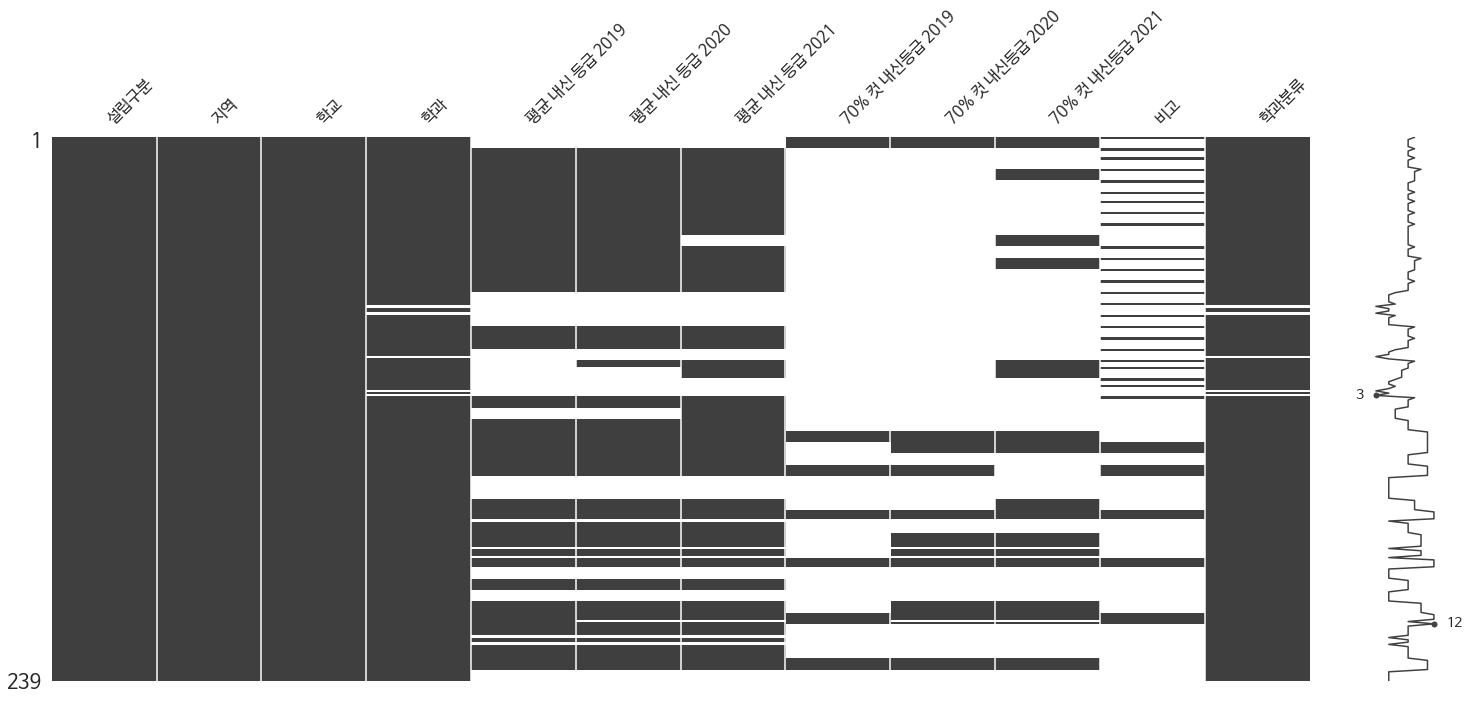

In [91]:
msno.matrix(df=전체내신등급) # 70%컷은 대부분 Null값 

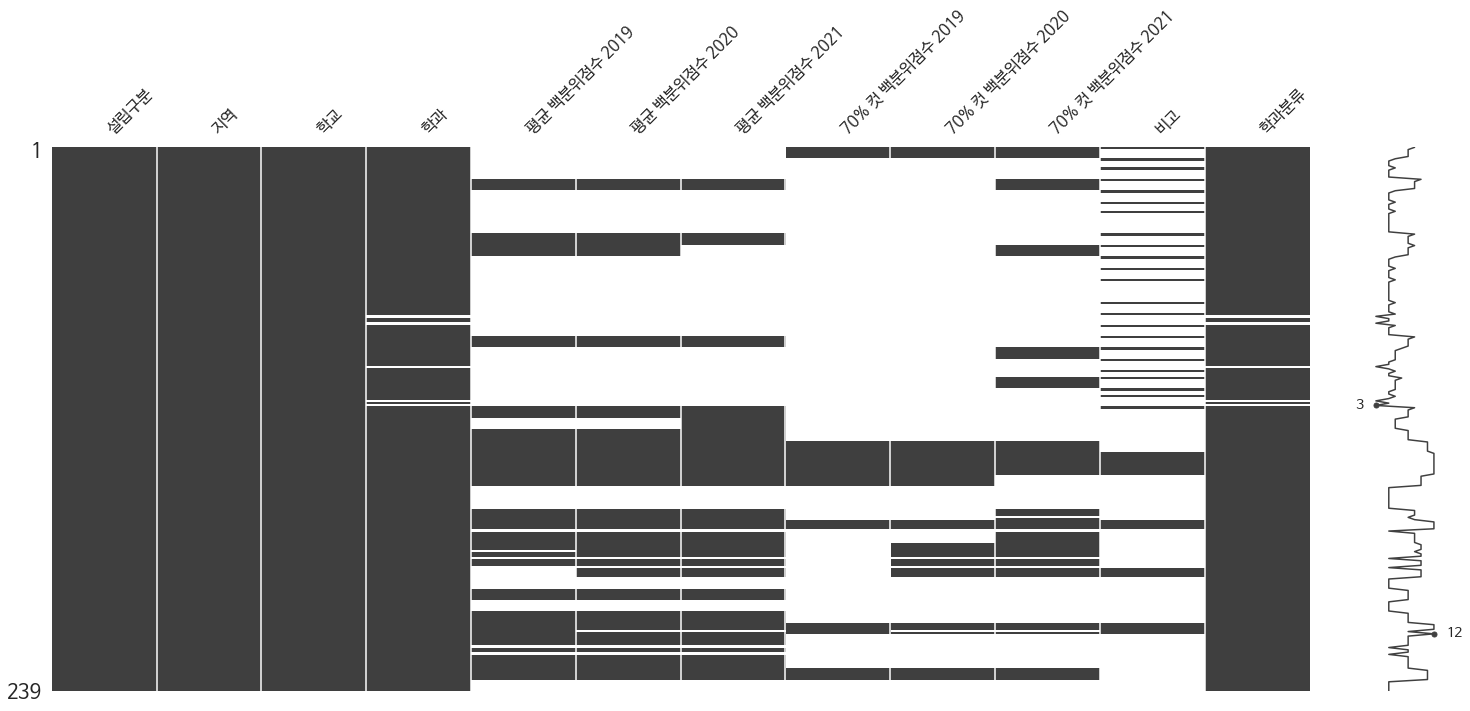

In [92]:
msno.matrix(df=전체정시점수) # null값 많음

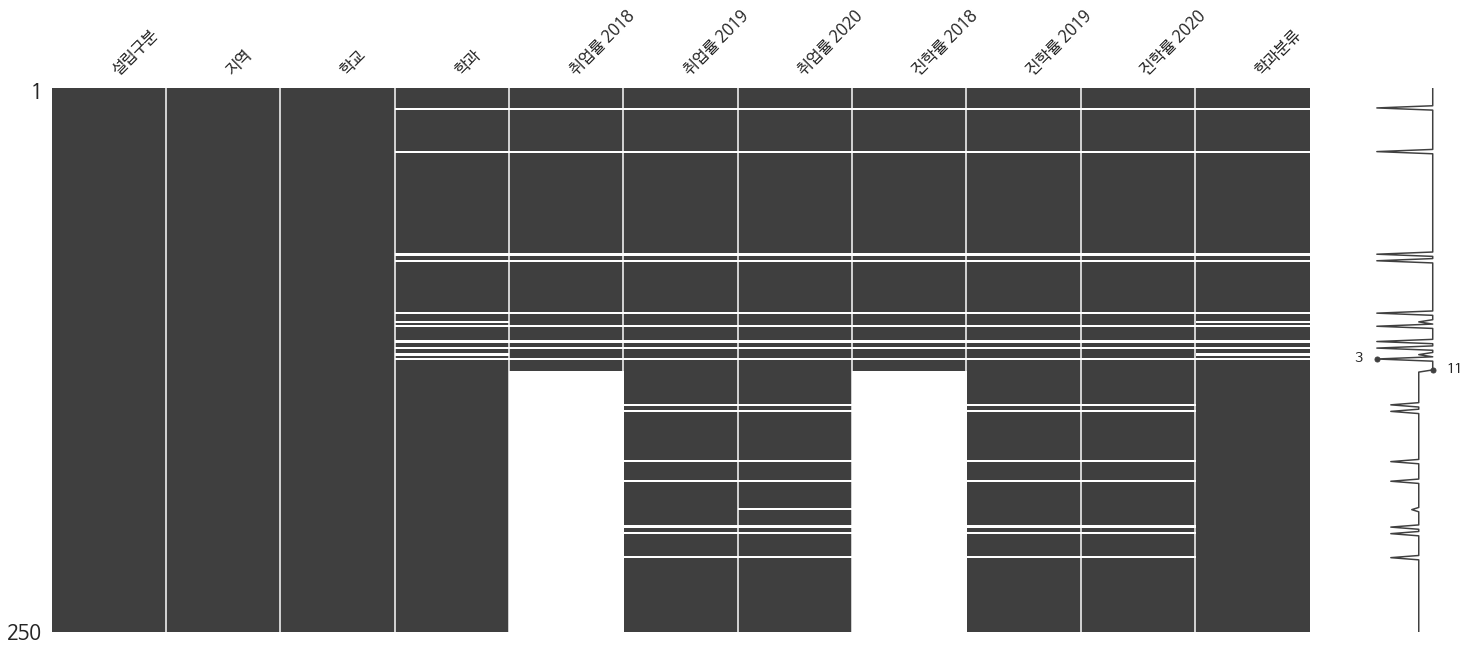

In [93]:
msno.matrix(df=졸업생_진학률_취업률) # 2018 년 자료에 nan이 많음 

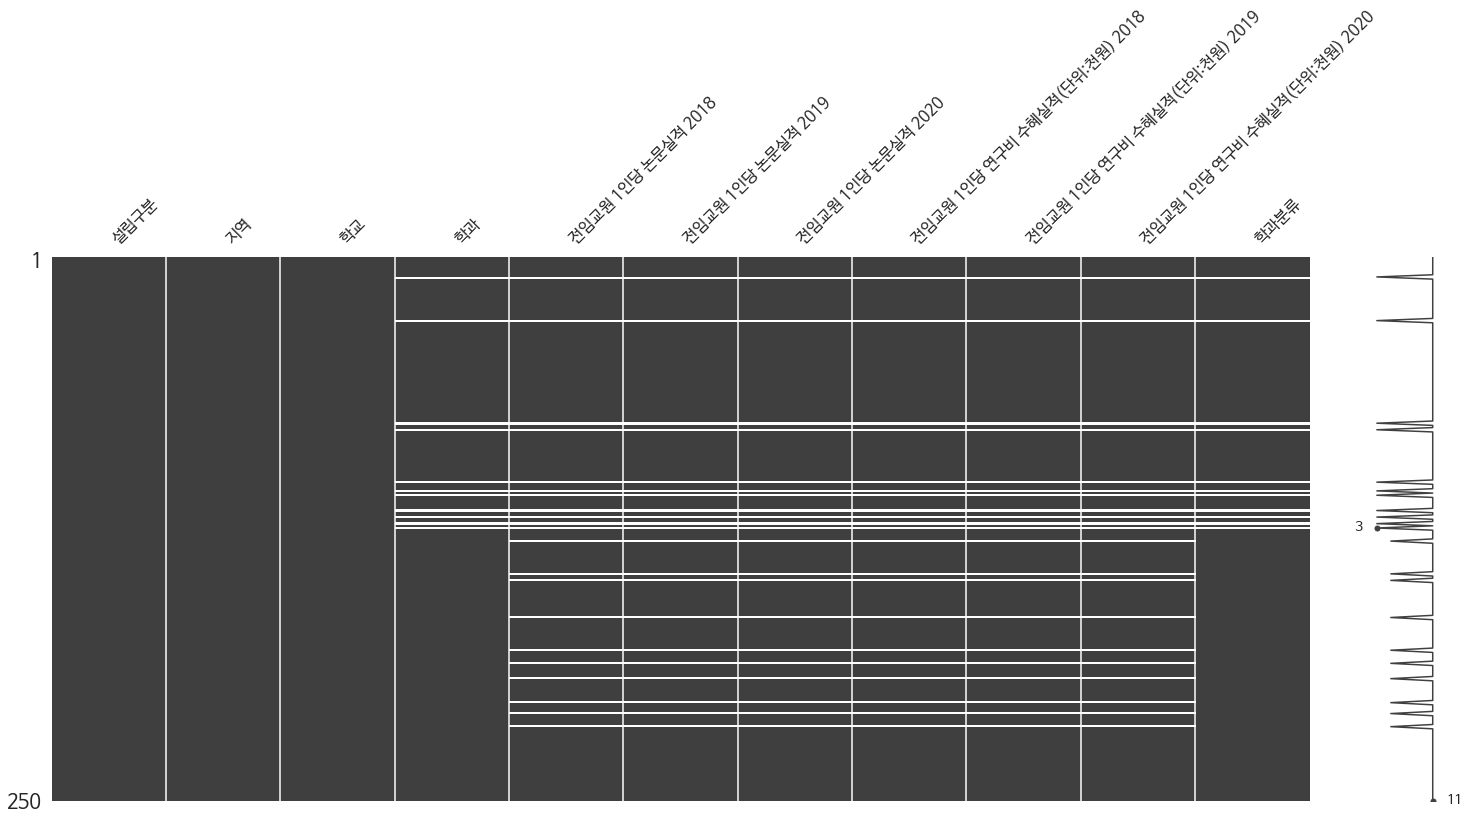

In [94]:
msno.matrix(df=연구_논문실적_수혜실적)

### 시각화

> 시각화 함수 정의 

In [95]:
def 산공vs산공외비교시각화(산공,산공외,group,col,년도): # 학교별, 산공vs산공외 
    '''
    :산공: dataframe
    :산공외: dataframe
    :col: str(column)
    :년도: str
    산공과 산공외 데이터프레임을 넣고 보고싶은 col을 설정해서 년도에 맞게 그려줌
    '''
    학교목록 = []
    학산 = []
    학산외 = []
    for 학교 in 산공.index.unique():
        학교산공 = 산공.map(lambda x: round(x,3)).loc[학교]
        학교산공외 = 산공외.map(lambda x: round(x,3)).loc[학교]
        print(학교,'산공: ',학교산공,'\n','산공외 평균: ',학교산공외)
        학교목록.append(학교)
        학산.append(학교산공)
        학산외.append(학교산공외)

    plt.figure(figsize=(32,16))
    plt.plot(pd.Series(학산,학교목록),label='산공',color='deeppink')
    plt.xticks(fontsize=13)
    plt.xticks(rotation=45)
    plt.yticks(fontsize=16)
    for i, v in enumerate(pd.Series(학산,학교목록).index):
        plt.text(v, pd.Series(학산,학교목록).values[i], pd.Series(학산,학교목록).values[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
                 fontsize = 9, 
                 color='blue',
                 horizontalalignment='center',  # horizontalalignment (left, center, right)
                 verticalalignment='bottom')    # verticalalignment (top, center, bottom)
    plt.plot(pd.Series(학산외,학교목록),label='산공 외',color='cyan')
    plt.xticks(fontsize=13)
    plt.xticks(rotation=45)
    plt.yticks(fontsize=16)
    for i, v in enumerate(pd.Series(학산외,학교목록).index):
        plt.text(v, pd.Series(학산외,학교목록).values[i], pd.Series(학산외,학교목록).values[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
                 fontsize = 9, 
                 color='blue',
                 horizontalalignment='center',  # horizontalalignment (left, center, right)
                 verticalalignment='bottom')    # verticalalignment (top, center, bottom)
    plt.title(f'{group}별 산공vs산공외 {col} {년도}',fontsize=25)
    plt.legend(bbox_to_anchor=(0.2, 1.1),ncol=2,prop={'size': 16})    
    plt.savefig(f'{group}별 산공vs산공외 {col} {년도} ver1.png', bbox_inches='tight', dpi=300)

In [96]:
def 학과별비교시각화(df,group,col='입학경쟁률',년도='2018'): # Default옵션
    '''
    :df: dataframe
    :group: str(비교그룹)
    :col: str(column)
    :년도: str
    전체 데이터프레임을 넣고 보고싶은 col을 설정해서 학과별로 최대-최소-평균값을 찾아 년도에 맞게 비교해줌
    '''
    plt.figure(figsize=(32,16))
    최대값 = df.agg([max],axis=1)
    최소값 = df.agg([min],axis=1)
    평균값 = df.agg([np.mean],axis=1)
    plt.scatter(x=최대값.index,y=최대값,label='5개학과 최대값')
    plt.scatter(x=최소값.index,y=최소값,label='5개학과 최소값')
    plt.scatter(x=평균값.index,y=평균값,label='5개학과 평균값')
    plt.plot(df['산업공학과'],label='산업공학과',color='deeppink') # 산공 꺾은선 그래프
    plt.xticks(fontsize=13)
    plt.xticks(rotation=45)
    plt.yticks(fontsize=16)
    plt.title(f'{group}별 학과별 {col} {년도}',fontsize=25)
    plt.legend(bbox_to_anchor=(0.2, 1.1),ncol=2,prop={'size': 16})
    plt.savefig(f'{group}별 학과별 {col} {년도} ver1.png', bbox_inches='tight', dpi=300)

In [97]:
def make_plot(df,기준='산공산공외',col='입학경쟁률',group=['학교','학과분류'],년도='2018'): # Default옵션
    '''
    :df: dataframe
    :기준: str(비교하고싶은 레벨)
    :col: str(column) 
    :group: list(그룹화할 칼럼기준)
    :년도: str
    자동으로 사용자설정에 따라 그림을 그려줌
    '''
    # '- - - -' dash 처리된 행 전처리
    for i in [4,5,6,7,8,9]:
            df.iloc[:,i] = df.iloc[:,i].apply(lambda x: np.nan if isinstance(x,str) else x)
    if 기준 == '산공산공외':
        산공 = df[df.학과분류=='산업공학과']
        산공외 = df[df.학과분류!='산업공학과']
        산공_ = 산공.groupby(group)[[f'{str(col)} {년도}']].mean().unstack()[f'{str(col)} {년도}'].loc[:,'산업공학과'] # 산업공학
        산공외_ = 산공외.groupby(group)[[f'{str(col)} {년도}']].mean().unstack()[f'{str(col)} {년도}'].iloc[:,[0,2,3,4]].mean(axis=1) # 산업공학 외
        산공vs산공외비교시각화(산공_,산공외_,group[0],col,년도)
        return print('산공vs산공외'+' '+년도)
    if 기준 == '학과':
        산공_ = df.groupby(group)[[f'{str(col)} {년도}']].mean().unstack()[f'{str(col)} {년도}'].loc[:,'산업공학과'] # 산공
        컴공_ = df.groupby(group)[[f'{str(col)} {년도}']].mean().unstack()[f'{str(col)} {년도}'].loc[:,'컴퓨터공학과'] # 컴공
        기공_ = df.groupby(group)[[f'{str(col)} {년도}']].mean().unstack()[f'{str(col)} {년도}'].loc[:,'기계공학과'] # 기공
        화공_ = df.groupby(group)[[f'{str(col)} {년도}']].mean().unstack()[f'{str(col)} {년도}'].loc[:,'화학공학과'] # 화공
        전전_ = df.groupby(group)[[f'{str(col)} {년도}']].mean().unstack()[f'{str(col)} {년도}'].loc[:,'전자전기공학과'] # 전전
        tot = pd.concat([산공_,컴공_,기공_,화공_,전전_],axis=1)
        학과별비교시각화(tot,group[0],col,년도)
        return print('학과별'+' '+년도)

### 새로운 데이터 전처리

In [306]:
def make_groupdf(df,col='입학경쟁률',years=[2018,2019,2020]): # 새로운 시각화를 위한 전처리
  result = pd.DataFrame()
  for year in years:
    산공 = df.groupby(['학과분류','지역','설립구분'])[f'{col} {year}'].mean().unstack().loc['산업공학과',:]
    컴공 = df.groupby(['학과분류','지역','설립구분'])[f'{col} {year}'].mean().unstack().loc['컴퓨터공학과',:] # 컴공
    기공 = df.groupby(['학과분류','지역','설립구분'])[f'{col} {year}'].mean().unstack().loc['기계공학과',:] # 기공
    화공 = df.groupby(['학과분류','지역','설립구분'])[f'{col} {year}'].mean().unstack().loc['화학공학과',:] # 화공
    전전 = df.groupby(['학과분류','지역','설립구분'])[f'{col} {year}'].mean().unstack().loc['전자전기공학과',:] # 전전
    산공['학과분류'] = '산업'
    컴공['학과분류'] = '컴퓨터'
    기공['학과분류'] = '기계'
    화공['학과분류'] = '화학'
    전전['학과분류'] = '전자전기'
    tot = pd.concat([산공,컴공,기공,화공,전전],axis=0)
    tot['지역'] = tot.index
    tot['년도'] = year
    tot = tot.reset_index(drop=True)
    result = pd.concat([result,tot],axis=0,ignore_index=True)
  return result

### 다른 시각화 

#### relplot

In [423]:
def make_relplot(df,group='학과분류',x_axis='null',y_axis='null'): # Default옵션
    '''
    '''
    sns.set(font="NanumBarunGothic", 
        style='darkgrid', rc={"grid.linewidth": 0.1,"axes.unicode_minus":False})
    col1 = df.columns[[4,5,6]]
    col2 = df.columns[[7,8,9]]
    yo = pd.DataFrame(df.groupby([group])[col1].mean())
    yo2 = pd.DataFrame(df.groupby([group])[col2].mean())
    sizes = df.groupby([group]).agg(len).iloc[:,2] # 각 학과별 학교 갯수
    for i in range(3):
      year = list(yo.columns)[i].split(' ')[-1]
      x = list(yo2.columns)[i]
      y = list(yo.columns)[i]
      x_name = x.split(' ')[0]
      y_name = y.split(' ')[0]
      with sns.plotting_context(rc={"legend.fontsize":14,"legend.title_size":16}):
        p = sns.relplot(x=f"{x}", y=f"{y}", hue=f"{group}", size='학교', data=pd.concat([yo,yo2,sizes],axis=1))
      if x_axis=='null':
        plt.xlabel(f"{x_name}", fontsize = 16)
      else:
        plt.xlabel(f"{x_axis}", fontsize = 16)
      if y_axis=='null':
        plt.ylabel(f"{y_name}", fontsize = 16)
      else:
        plt.ylabel(f"{y_axis}", fontsize = 16)
      if x_axis=='null' or y_axis=='null':
        plt.title(f'{group}별 {x_name} {y_name} {year}',fontsize=22)
        plt.savefig(f'{group}별 {x_name} {y_name} relplot.png', bbox_inches='tight', dpi=450)
      else:
        plt.title(f'{group}별 {x_axis} {y_axis} {year}',fontsize=22)
        plt.savefig(f'{group}별 {x_axis} {y_axis} relplot.png', bbox_inches='tight', dpi=450)

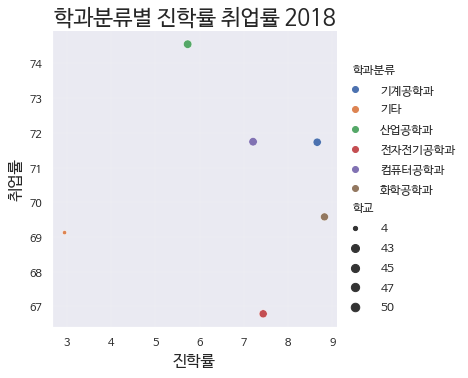

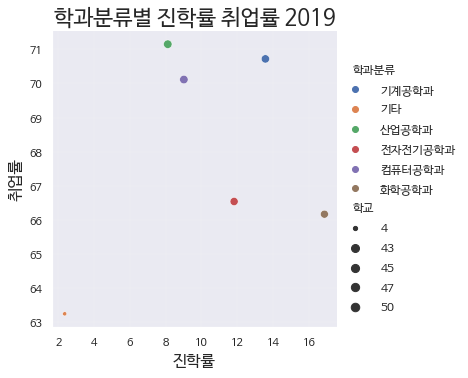

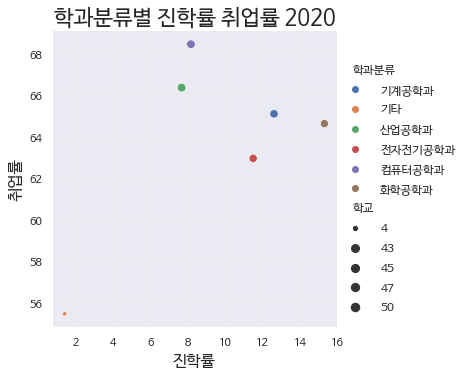

In [424]:
make_relplot(졸업생_진학률_취업률,'학과분류')

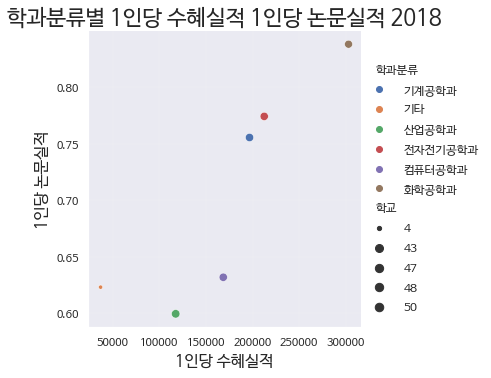

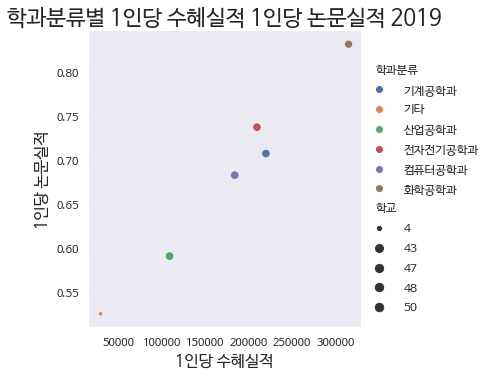

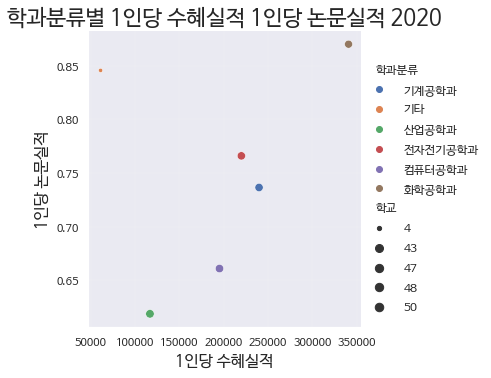

In [425]:
make_relplot(연구_논문실적_수혜실적,'학과분류',x_axis='1인당 수혜실적',y_axis='1인당 논문실적')

#### 기타 plot(수동작업포함)

In [290]:
신입생_경쟁률_tot = make_groupdf(신입생_경쟁률_충원률)
신입생_경쟁률_tot.head(3)

설립구분,국공립,사립,학과분류,지역,년도
0,7.850000,6.788889,산업,남부권,2018
1,7.433333,12.422222,산업,수도권,2018
2,5.200000,5.100000,산업,중부권,2018


##### 입학경쟁률

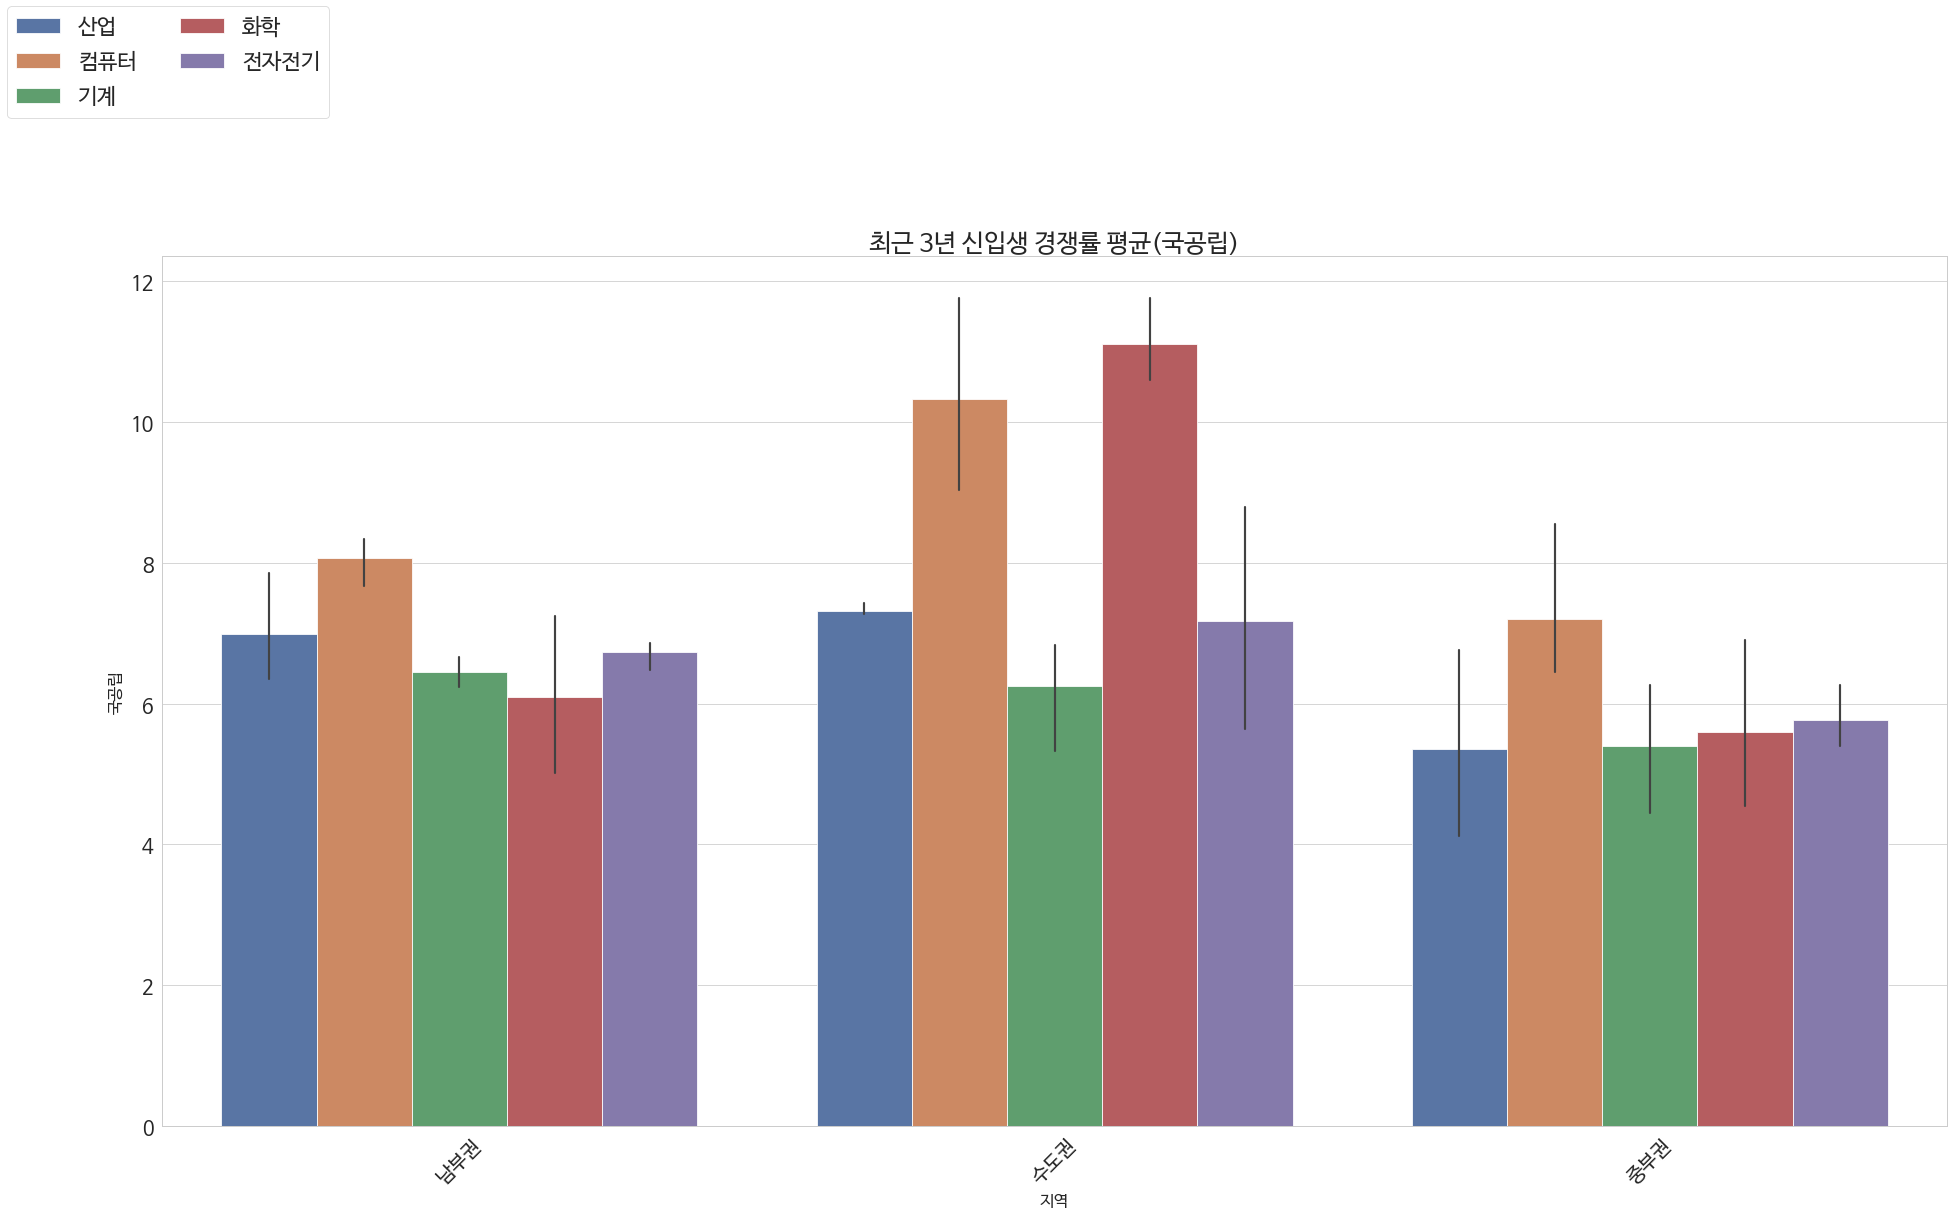

In [299]:
plt.figure(figsize=(32,16))
plt.title('최근 3년 신입생 경쟁률 평균(국공립)',size=25)
sns.barplot(data=신입생_경쟁률_tot, x='지역',y='국공립',hue='학과분류') # 산공 꺾은선 그래프
plt.xticks(fontsize=20)
plt.xticks(rotation=45)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(0.1, 1.3),ncol=2,prop={'size': 22})

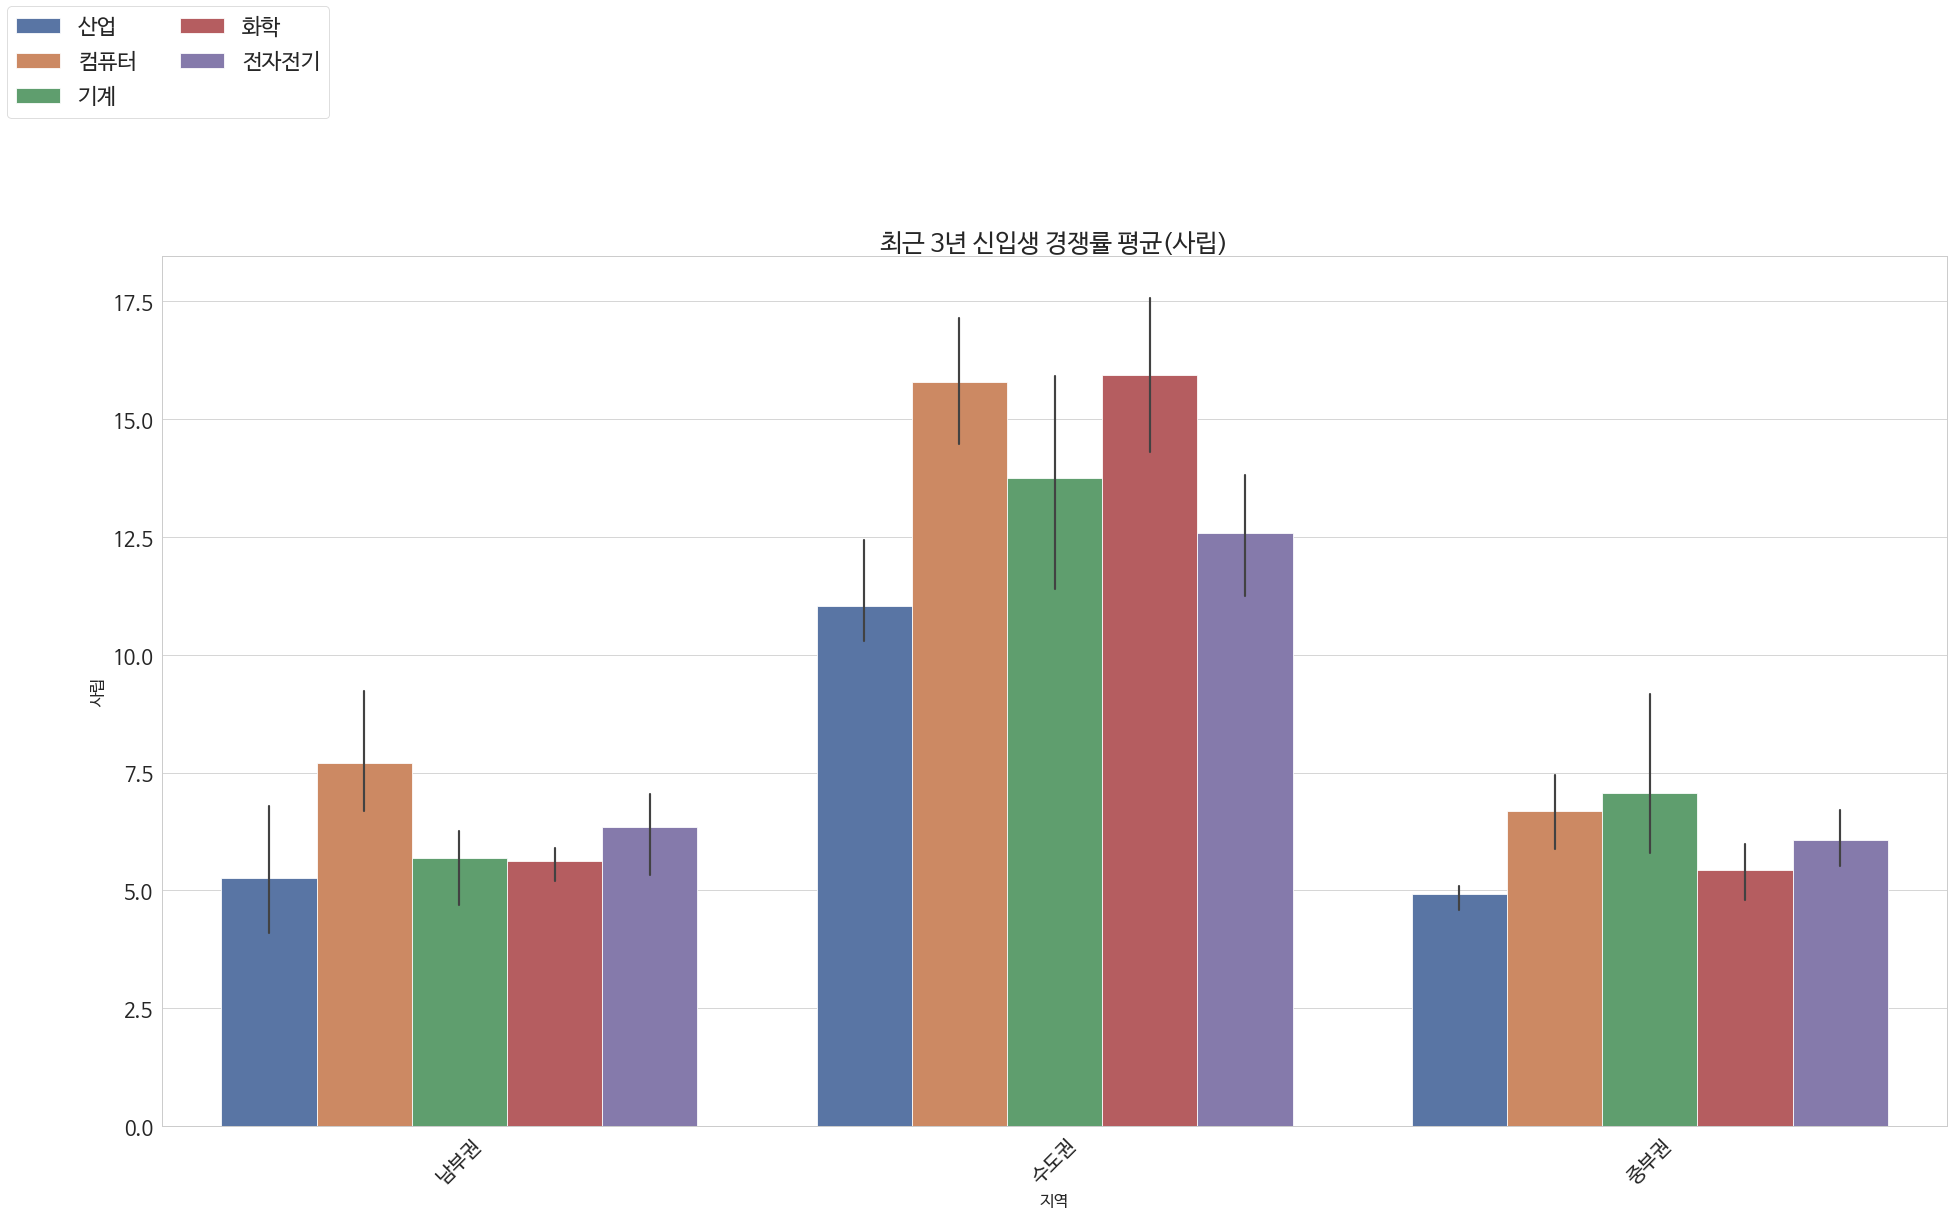

In [300]:
plt.figure(figsize=(32,16))
plt.title('최근 3년 신입생 경쟁률 평균(사립)',size=25)
sns.barplot(data=신입생_경쟁률_tot, x='지역',y='사립',hue='학과분류') # 산공 꺾은선 그래프
plt.xticks(fontsize=20)
plt.xticks(rotation=45)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(0.1, 1.3),ncol=2,prop={'size': 22})

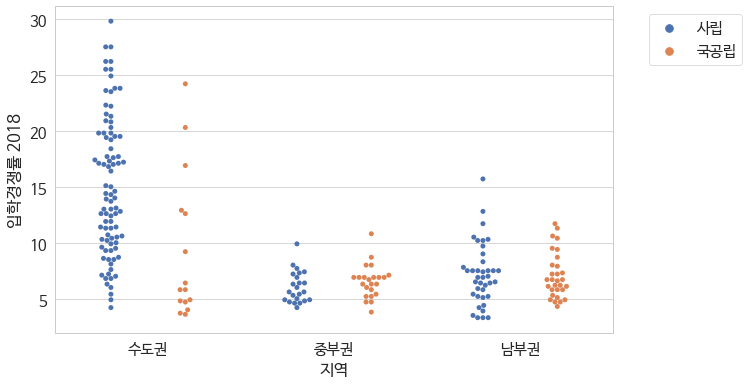

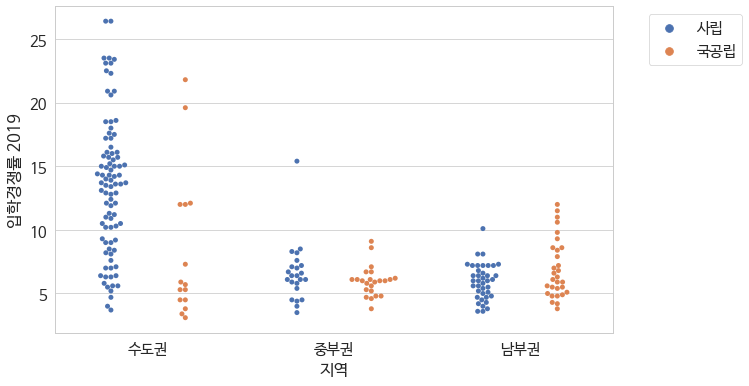

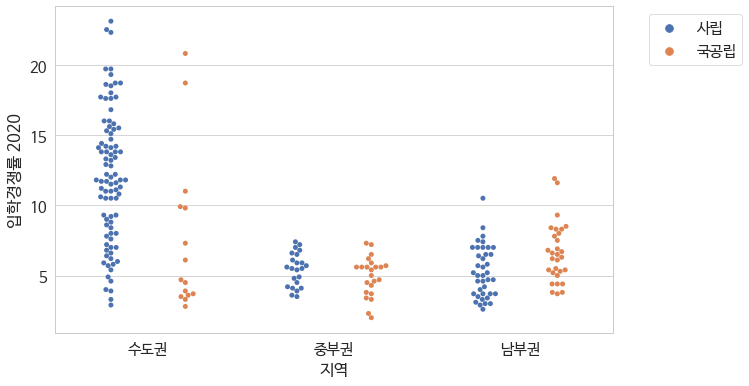

In [210]:
sns.set_context("paper", font_scale=1.7)  

plt.figure(figsize=(10,6))
sns.swarmplot(x="지역", y="입학경쟁률 2018", hue="설립구분", 
              data=신입생_경쟁률_충원률, dodge=True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.figure(figsize=(10,6))
sns.swarmplot(x="지역", y="입학경쟁률 2019", hue="설립구분", 
              data=신입생_경쟁률_충원률, dodge=True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.figure(figsize=(10,6))
sns.swarmplot(x="지역", y="입학경쟁률 2020", hue="설립구분", 
              data=신입생_경쟁률_충원률, dodge=True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show()

##### 신입생 충원률

##### 연구실적 

In [311]:
연구_논문실적_tot = make_groupdf(연구_논문실적_수혜실적,col='전임교원 1인당 논문실적')
연구_논문실적_tot.head(3)

설립구분,국공립,사립,학과분류,지역,년도
0,0.593575,0.406132,산업,남부권,2018
1,0.483980,0.801787,산업,수도권,2018
2,0.381172,0.393803,산업,중부권,2018


##### 연구비 수혜실적

In [312]:
연구비_수혜실적_tot = make_groupdf(연구_논문실적_수혜실적,col='전임교원 1인당 연구비 수혜실적(단위:천원)')
연구비_수혜실적_tot.head(3)

설립구분,국공립,사립,학과분류,지역,년도
0,83238.967017,82855.957848,산업,남부권,2018
1,155071.033333,115900.127511,산업,수도권,2018
2,106361.190000,223728.768571,산업,중부권,2018


##### 졸업생 취업률

In [317]:
졸업생_취업률 = make_groupdf(졸업생_진학률_취업률,col='취업률')
졸업생_취업률.head(3)

설립구분,국공립,사립,학과분류,지역,년도
0,73.733333,62.80000,산업,남부권,2018
1,NaN,77.59375,산업,수도권,2018
2,72.400000,89.30000,산업,중부권,2018


##### 졸업생 진학률

In [316]:
졸업생_진학률 = make_groupdf(졸업생_진학률_취업률,col='진학률')
졸업생_진학률.head(3)

설립구분,국공립,사립,학과분류,지역,년도
0,19.566667,1.32000,산업,남부권,2018
1,NaN,5.23125,산업,수도권,2018
2,0.000000,0.00000,산업,중부권,2018


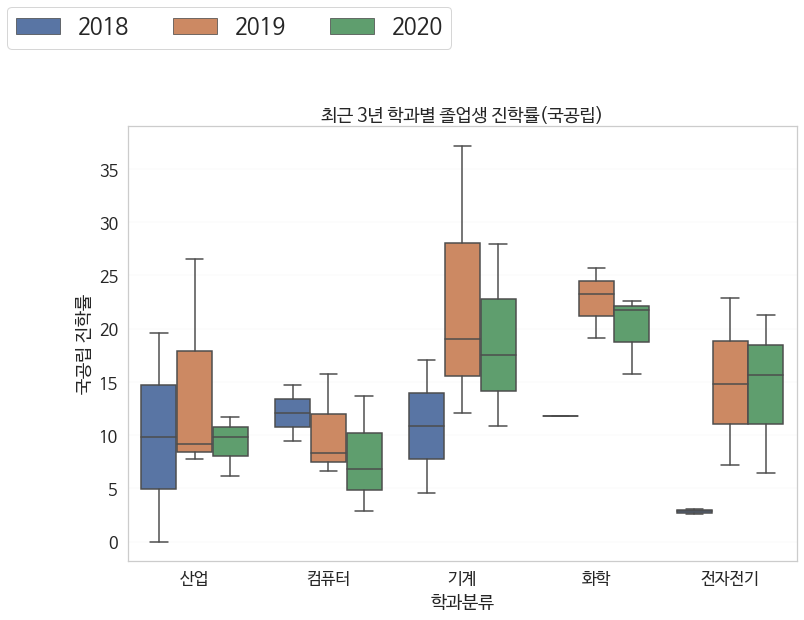

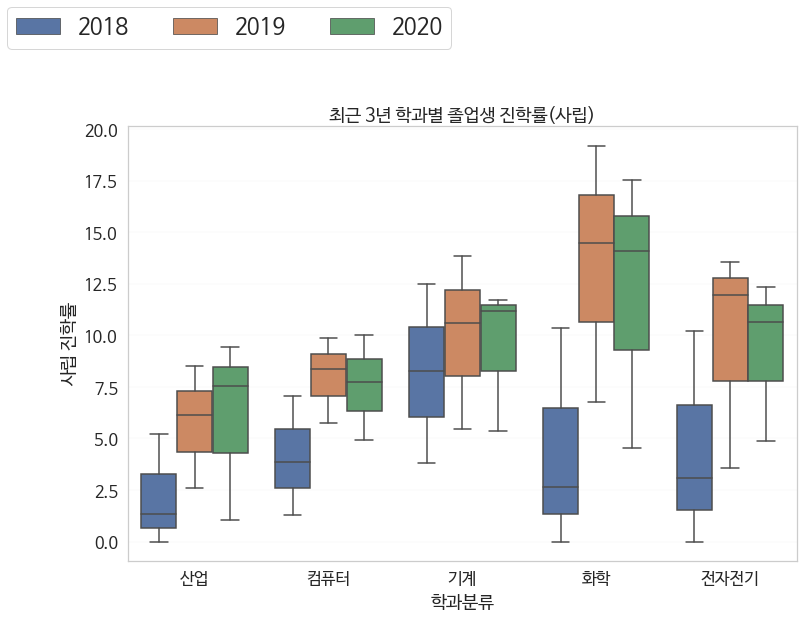

In [381]:
sns.set(font="NanumBarunGothic", 
        style='whitegrid', rc={"grid.linewidth": 0.1,"axes.unicode_minus":False},
        font_scale=1.5)
plt.figure(figsize=(12,8))
sns.boxplot(x="학과분류", y="국공립", hue='년도',data=졸업생_진학률).set(
    xlabel='학과분류', ylabel='국공립 진학률')
plt.title('최근 3년 학과별 졸업생 진학률(국공립)')
plt.legend(bbox_to_anchor=(0.5, 1.3),ncol=3,prop={'size': 22})

plt.figure(figsize=(12,8))
sns.boxplot(x="학과분류", y="사립", hue='년도',data=졸업생_진학률).set(
    xlabel='학과분류', ylabel='사립 진학률')
plt.title('최근 3년 학과별 졸업생 진학률(사립)')
plt.legend(bbox_to_anchor=(0.5, 1.3),ncol=3,prop={'size': 22})
plt.show()

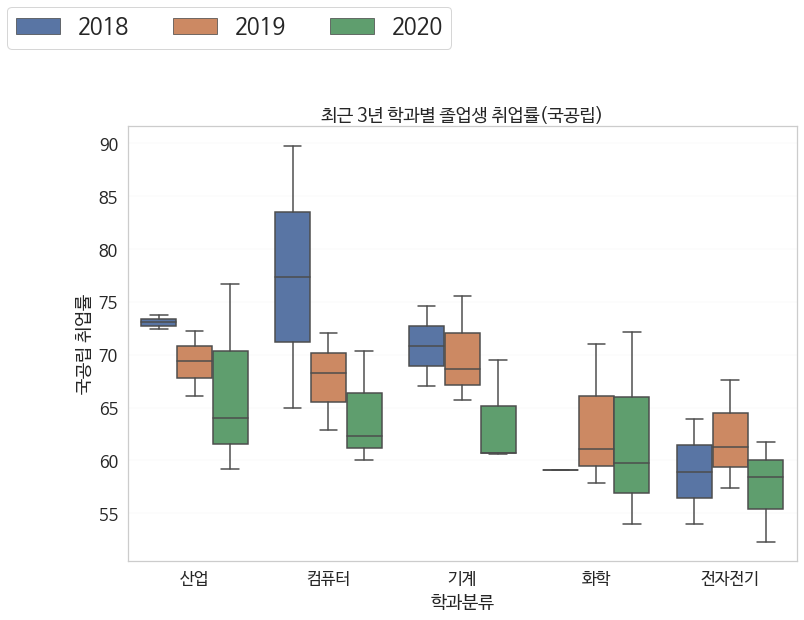

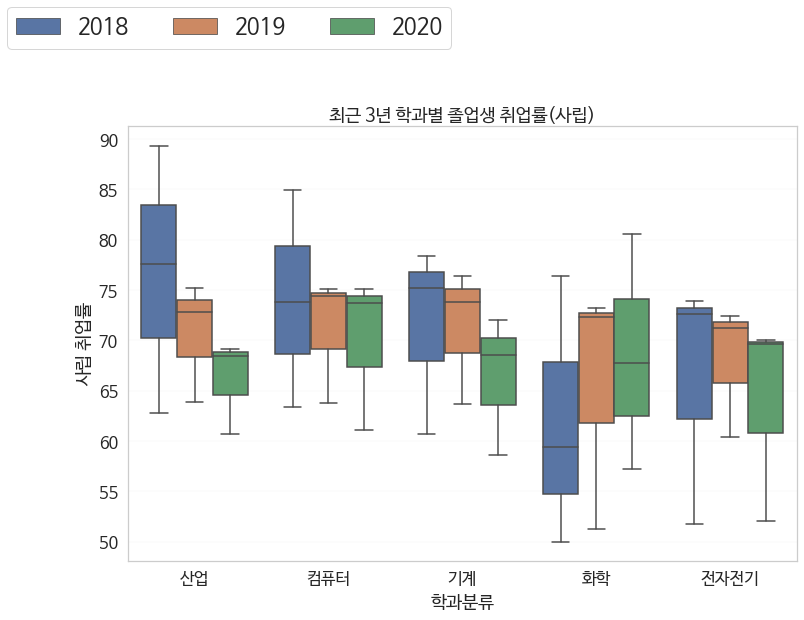

In [359]:
sns.set(font="NanumBarunGothic", 
        style='whitegrid', rc={"grid.linewidth": 0.1,"axes.unicode_minus":False},
        font_scale=1.5)

plt.figure(figsize=(12,8))
sns.boxplot(x="학과분류", y="국공립", hue='년도',data=졸업생_취업률).set(
    xlabel='학과분류', ylabel='국공립 취업률')
plt.title('최근 3년 학과별 졸업생 취업률(국공립)')
plt.legend(bbox_to_anchor=(0.5, 1.3),ncol=3,prop={'size': 22})

plt.figure(figsize=(12,8))
sns.boxplot(x="학과분류", y="사립", hue='년도',data=졸업생_취업률).set(
    xlabel='학과분류', ylabel='사립 취업률')
plt.title('최근 3년 학과별 졸업생 취업률(사립)')
plt.legend(bbox_to_anchor=(0.5, 1.3),ncol=3,prop={'size': 22})
plt.show()

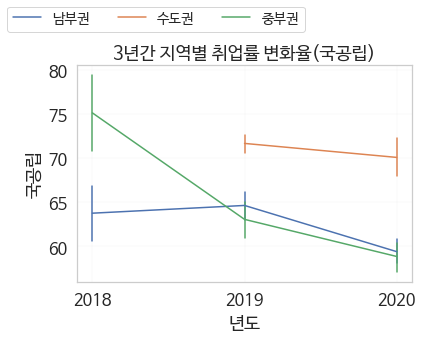

In [412]:
g = sns.lineplot(x='년도',y='국공립',hue='지역',data=졸업생_취업률,err_style="bars", ci=68)
plt.legend(bbox_to_anchor=(0.7, 1.3),ncol=3,prop={'size': 14})
plt.title('3년간 지역별 취업률 변화율(국공립)')
g.set_xticks([2018,2019,2020])

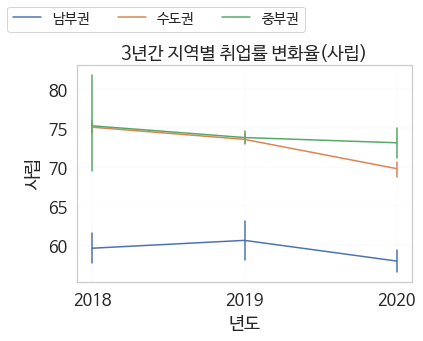

In [411]:
g = sns.lineplot(x='년도',y='사립',hue='지역',data=졸업생_취업률,err_style="bars", ci=68)
plt.legend(bbox_to_anchor=(0.7, 1.3),ncol=3,prop={'size': 14})
plt.title('3년간 지역별 취업률 변화율(사립)')
g.set_xticks([2018,2019,2020])

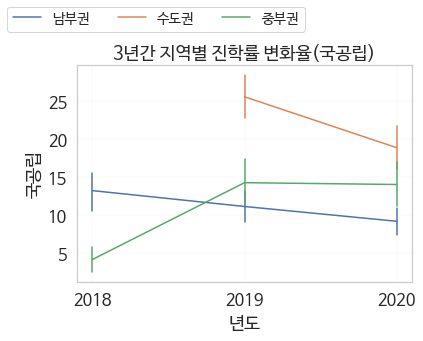

In [413]:
q = sns.lineplot(x='년도',y='국공립',hue='지역',data=졸업생_진학률,err_style="bars", ci=68)
plt.legend(bbox_to_anchor=(0.7, 1.3),ncol=3,prop={'size': 14})
plt.title('3년간 지역별 진학률 변화율(국공립)')
q.set_xticks([2018,2019,2020])

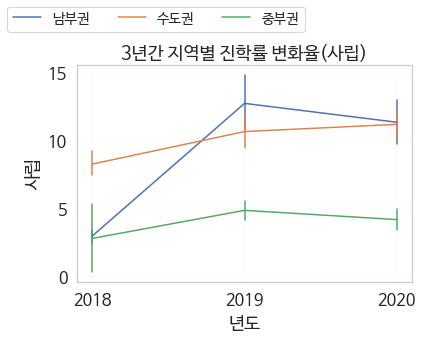

In [414]:
q = sns.lineplot(x='년도',y='사립',hue='지역',data=졸업생_진학률,err_style="bars", ci=68)
plt.legend(bbox_to_anchor=(0.7, 1.3),ncol=3,prop={'size': 14})
plt.title('3년간 지역별 진학률 변화율(사립)')
q.set_xticks([2018,2019,2020])

##### 재적학생현황 

In [469]:
ha1 = 재적학생현황.groupby(['학과분류','지역'])['재적학생수 2019'].mean().unstack()
ha1['학과분류'] = ha1.index
ha1.reset_index(drop=True)
ha1['년도'] = 2019

ha2 = 재적학생현황.groupby(['학과분류','지역'])['재적학생수 2020'].mean().unstack()
ha2['학과분류'] = ha2.index
ha2.reset_index(drop=True)
ha2['년도'] = 2020

ha3 = 재적학생현황.groupby(['학과분류','지역'])['재적학생수 2021'].mean().unstack()
ha3['학과분류'] = ha3.index
ha3.reset_index(drop=True)
ha3['년도'] = 2021

ha_tot = pd.concat([ha1,ha2,ha3],axis=0,ignore_index=True)
ha_tot

지역,남부권,수도권,중부권,충남,학과분류,년도
0,705.866667,768.363636,542.250000,193.0,기계공학과,2019
1,457.000000,373.333333,NaN,NaN,기타,2019
2,265.312500,359.750000,276.000000,334.0,산업공학과,2019
3,521.285714,835.476190,517.500000,358.0,전자전기공학과,2019
4,473.285714,655.869565,400.857143,341.0,컴퓨터공학과,2019
5,403.833333,544.950000,314.000000,76.0,화학공학과,2019
6,767.466667,794.636364,537.875000,190.0,기계공학과,2020
7,433.000000,380.000000,NaN,NaN,기타,2020
8,259.062500,353.791667,291.375000,324.5,산업공학과,2020
9,441.285714,888.904762,539.125000,348.5,전자전기공학과,2020


Text(0.5, 1.0, '3년간 학과별 재적학생수')

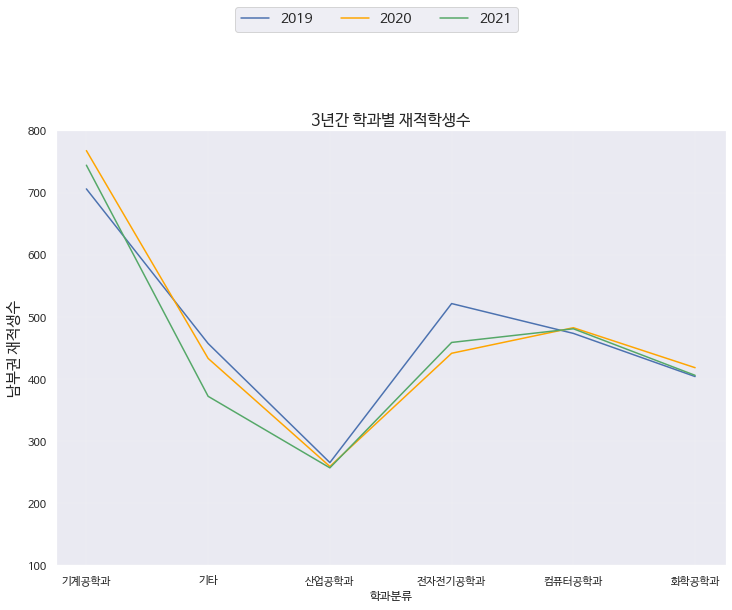

In [496]:
plt.figure(figsize=(12,8))
a = sns.lineplot(x='학과분류',y='남부권',data=ha_tot,hue='년도',palette=['b', 'orange','g'], linewidth=1.5)
a.set_yticks(range(100,900,100))
plt.legend(bbox_to_anchor=(0.7, 1.3),ncol=3,prop={'size': 14})
a.set_ylabel("남부권 재적생수", fontsize = 15)
plt.title('3년간 학과별 재적학생수',fontsize=16)

Text(0.5, 1.0, '3년간 학과별 재적학생수')

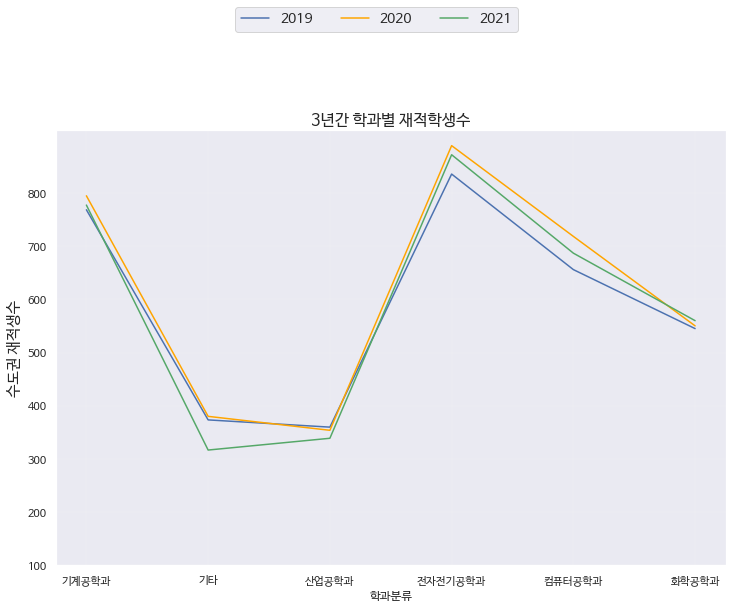

In [502]:
plt.figure(figsize=(12,8))
a = sns.lineplot(x='학과분류',y='수도권',data=ha_tot,hue='년도',palette=['b', 'orange','g'], linewidth=1.5)
a.set_yticks(range(100,900,100))
plt.legend(bbox_to_anchor=(0.7, 1.3),ncol=3,prop={'size': 14})
a.set_ylabel("수도권 재적생수", fontsize = 15)
plt.title('3년간 학과별 재적학생수',fontsize=16)

Text(0.5, 1.0, '3년간 학과별 재적학생수')

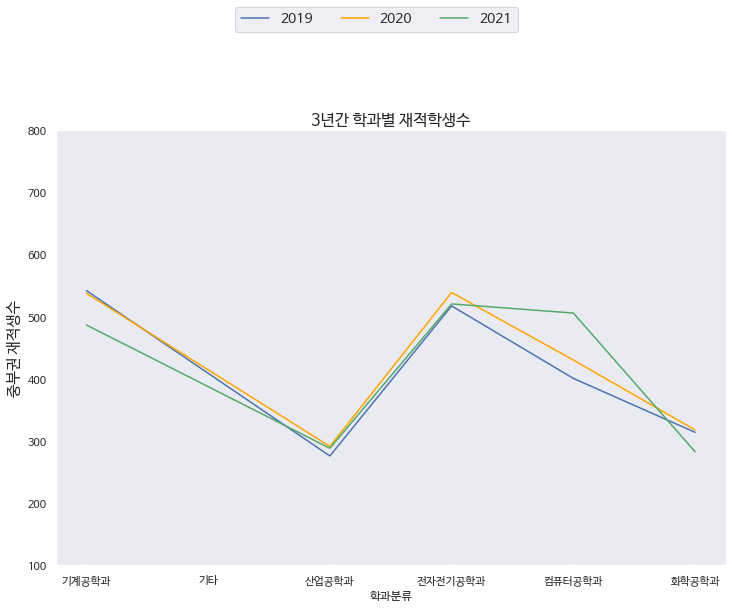

In [503]:
plt.figure(figsize=(12,8))
a = sns.lineplot(x='학과분류',y='중부권',data=ha_tot,hue='년도',palette=['b', 'orange','g'], linewidth=1.5)
a.set_yticks(range(100,900,100))
plt.legend(bbox_to_anchor=(0.7, 1.3),ncol=3,prop={'size': 14})
a.set_ylabel("중부권 재적생수", fontsize = 15)
plt.title('3년간 학과별 재적학생수',fontsize=16)

Text(0.5, 1.0, '3년간 학과별 재적학생수')

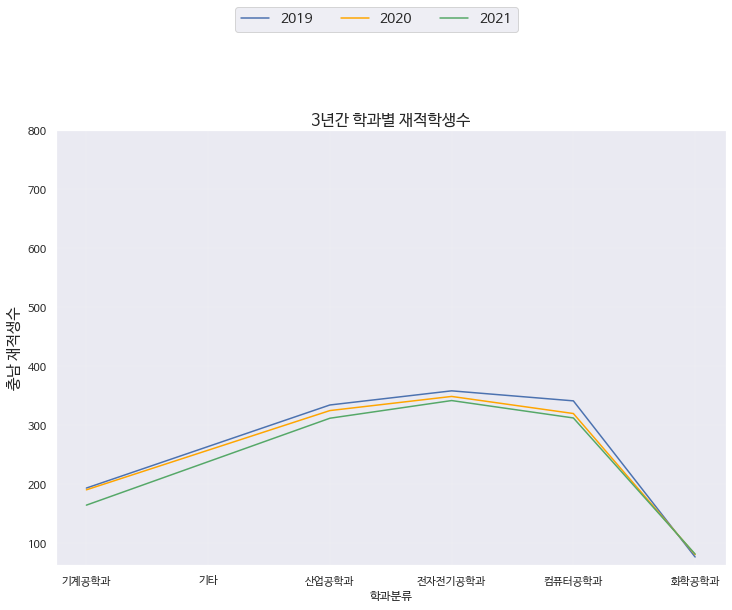

In [505]:
plt.figure(figsize=(12,8))
a = sns.lineplot(x='학과분류',y='충남',data=ha_tot,hue='년도',palette=['b', 'orange','g'], linewidth=1.5)
a.set_yticks(range(100,900,100))
plt.legend(bbox_to_anchor=(0.7, 1.3),ncol=3,prop={'size': 14})
a.set_ylabel("충남 재적생수", fontsize = 15)
plt.title('3년간 학과별 재적학생수',fontsize=16)

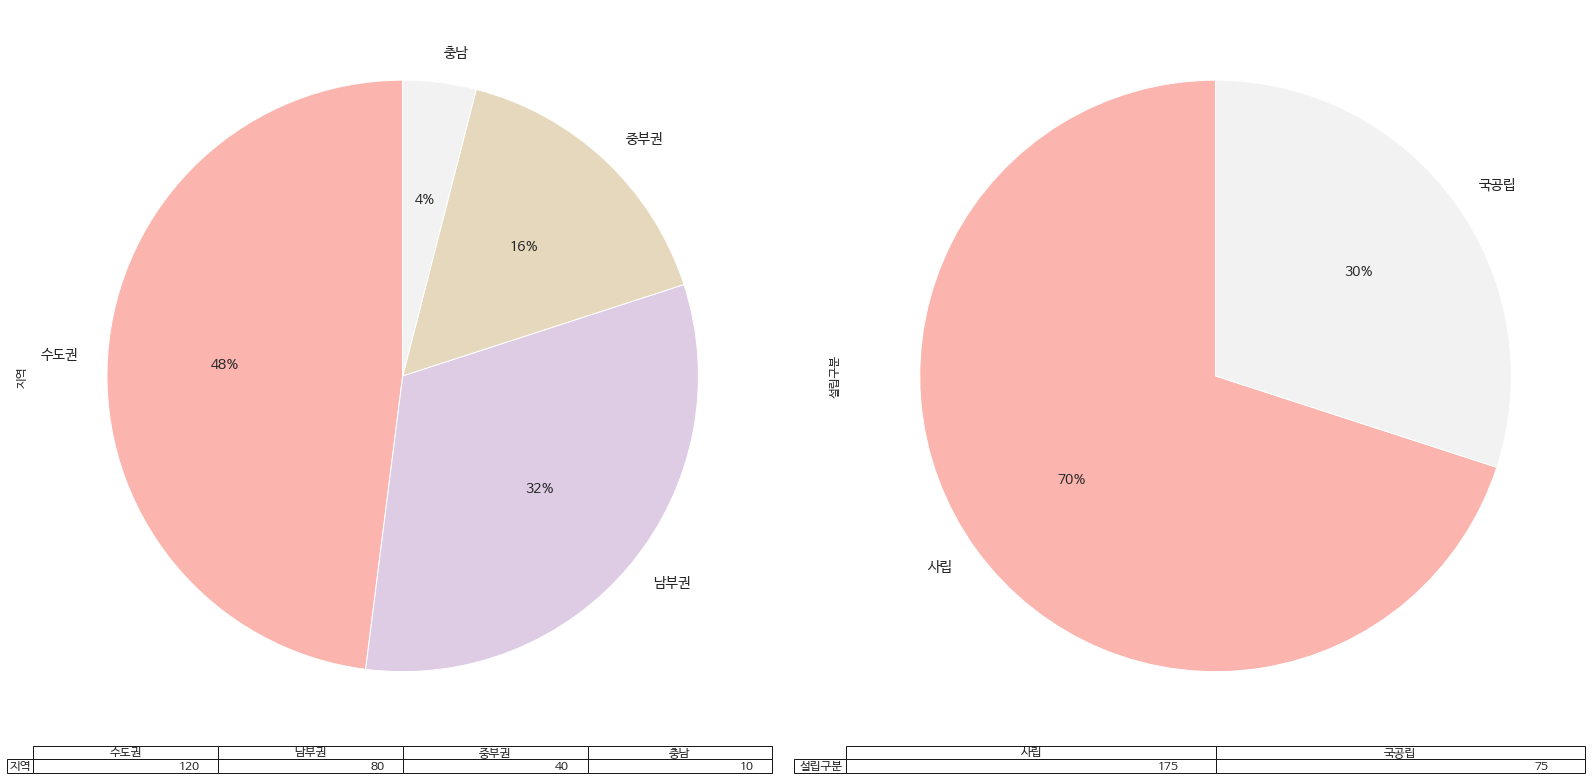

In [501]:
fig, axs = plt.subplots(ncols=2, figsize=(22,12),constrained_layout=True)
재적학생현황['지역'].value_counts().plot.pie(autopct='%.0f%%', colormap='Pastel1',
                                            table=True,fontsize=14,startangle=90, ax=axs[0])
재적학생현황['설립구분'].value_counts().plot.pie(autopct='%.0f%%', colormap='Pastel1',
                                            table=True,fontsize=14,startangle=90, ax=axs[1])

In [432]:
재적학생수_tot = make_groupdf(재적학생현황,'재적학생수',years=[2019,2020,2021])
재적학생수_tot.head(3)

설립구분,국공립,사립,학과분류,지역,년도
0,265.571429,265.111111,산업,남부권,2019
1,288.000000,370.000000,산업,수도권,2019
2,145.500000,406.500000,산업,중부권,2019


In [433]:
재적탈락률_tot = make_groupdf(재적학생현황,'탈락률',years=[2019,2020,2021])
재적탈락률_tot.head(3)

설립구분,국공립,사립,학과분류,지역,년도
0,3.622635,3.536719,산업,남부권,2019
1,3.300000,2.869074,산업,수도권,2019
2,9.625000,3.325000,산업,중부권,2019


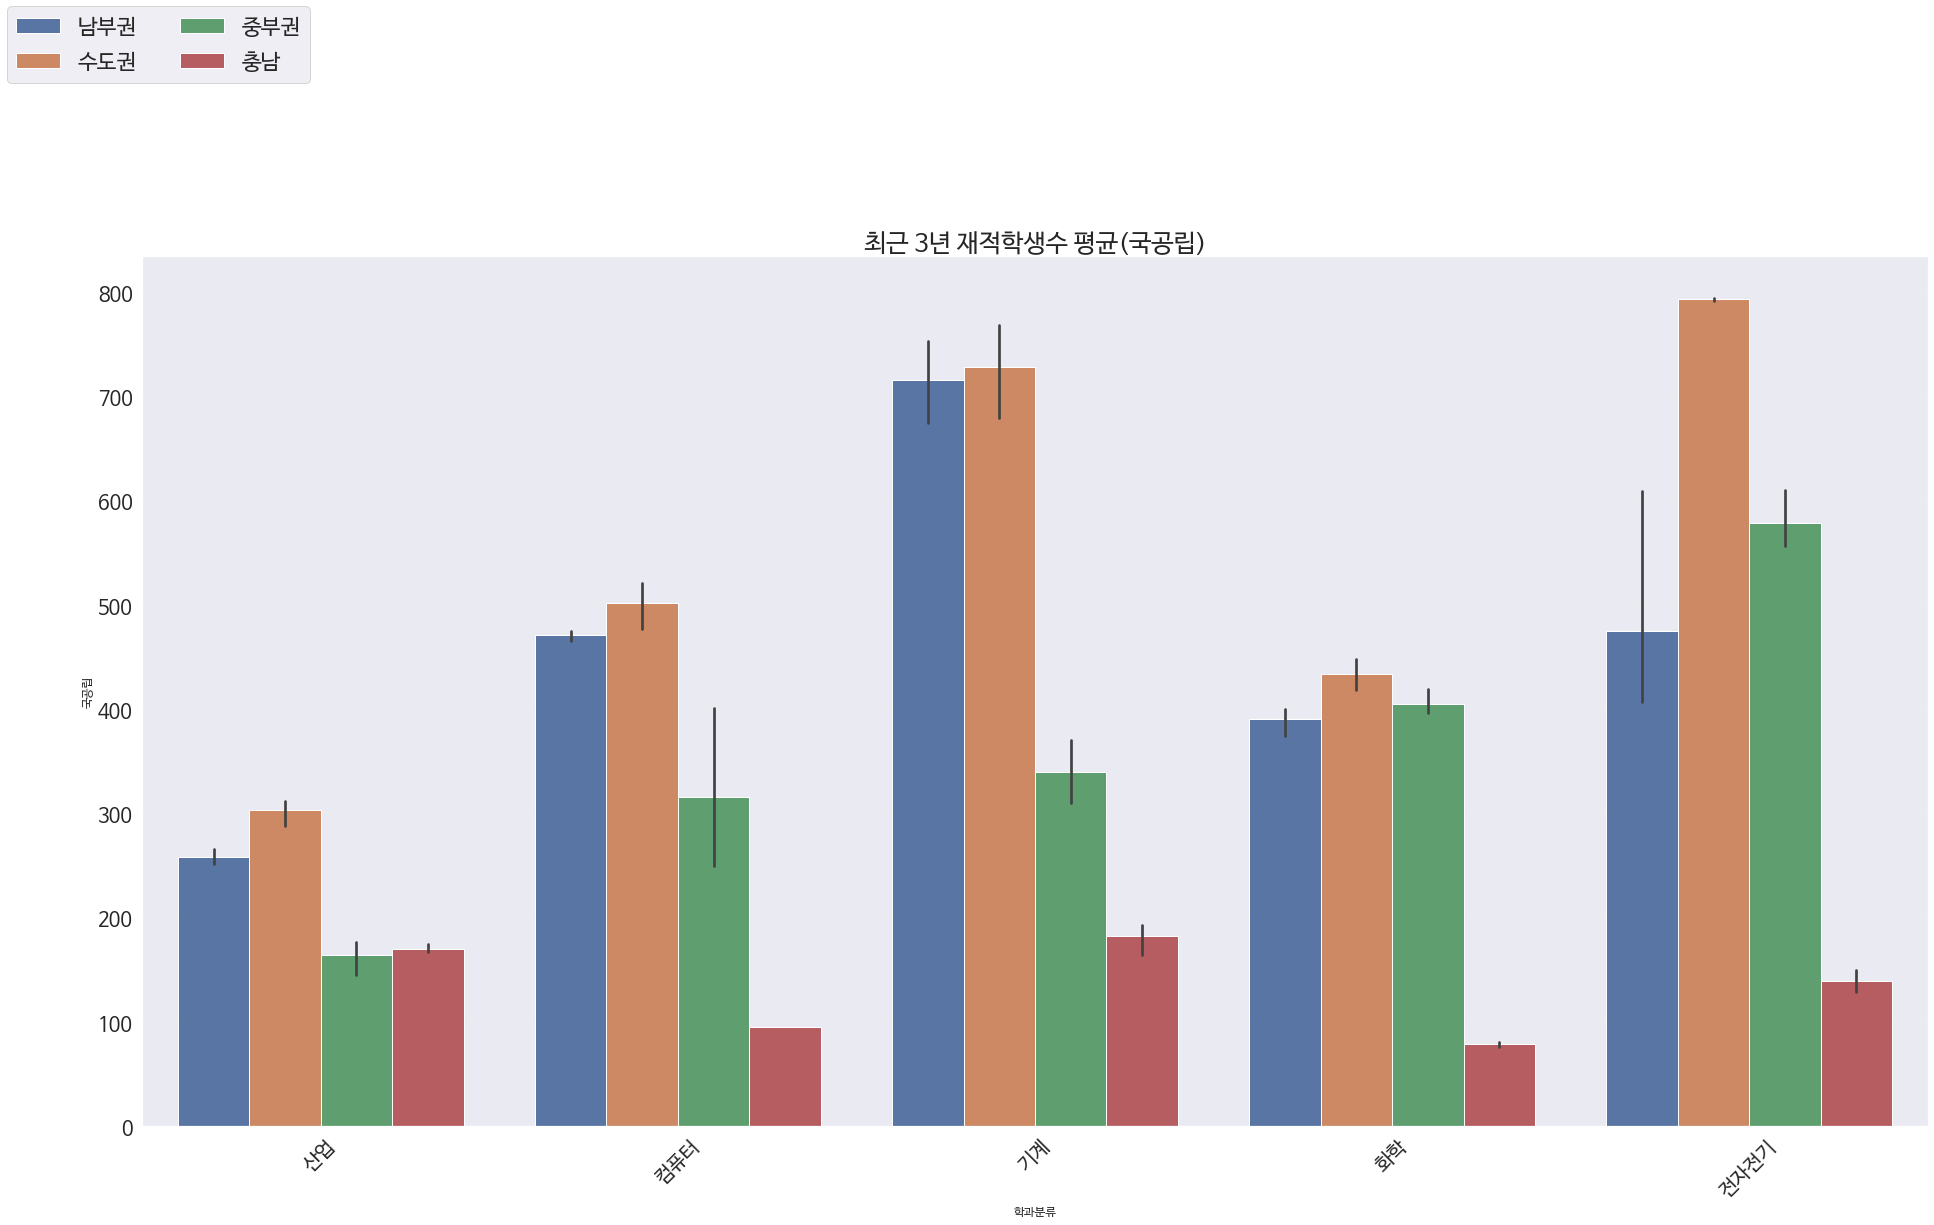

In [453]:
plt.figure(figsize=(32,16))
plt.title('최근 3년 재적학생수 평균(국공립)',size=25)
sns.barplot(data=재적학생수_tot, x='학과분류',y='국공립',hue='지역') # 산공 꺾은선 그래프
plt.xticks(fontsize=20)
plt.xticks(rotation=45)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(0.1, 1.3),ncol=2,prop={'size': 22})

#### barplot

In [442]:
def make_barplot(df,group='학과분류'): # Default옵션
    '''
    '''
    col1 = df.columns[[4,5,6]]
    col2 = df.columns[[7,8,9]]
    print('정상')
    yo = pd.DataFrame(df.groupby([group])[col1].mean())
    yo2 = pd.DataFrame(df.groupby([group])[col2].mean())
    print('정상')
    for i in range(3):
      year = list(yo.columns)[i].split(' ')[1]
      x = list(yo2.columns)[i]
      y = list(yo.columns)[i]
      x_name = x.split(' ')[0]
      y_name = y.split(' ')[0]
      print('정상')
      with sns.plotting_context(rc={"legend.fontsize":14,"legend.title_size":16}):
        p = sns.barplot(x=f"{x}", y=f"{y}", hue=f"{group}", data=pd.concat([yo,yo2],axis=1))
      print('정상')
      plt.xlabel(f"{x_name}", fontsize = 16)
      plt.ylabel(f"{y_name}", fontsize = 16)
      plt.title(f'{group}별 학과별 {year}',fontsize=22)
      plt.savefig(f'{group}별 학과별 {x_name} {y_name} barplot.png', bbox_inches='tight', dpi=450)

In [ ]:
print(np.argmax(신입생_경쟁률_충원률[신입생_경쟁률_충원률.학과분류=='산업공학과']['3년 입학경쟁률']))
print(np.mean(신입생_경쟁률_충원률[신입생_경쟁률_충원률.학과분류=='산업공학과']['3년 입학경쟁률']))
신입생_경쟁률_충원률[신입생_경쟁률_충원률.학과분류=='산업공학과'].iloc[22]

#### pieplot

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(22,12),constrained_layout=True)
신입생_경쟁률_충원률['학과분류'].value_counts().plot.pie(autopct='%.0f%%', colormap='Pastel1',
                                            table=True,fontsize=14,startangle=90, ax=axs[0])
신입생_경쟁률_충원률['설립구분'].value_counts().plot.pie(autopct='%.0f%%', colormap='Pastel1',
                                            table=True,fontsize=14,startangle=90, ax=axs[1])
신입생_경쟁률_충원률['지역'].value_counts().plot.pie(autopct='%.0f%%', colormap='Pastel1',
                                            table=True,fontsize=14,startangle=90, ax=axs[2])

In [ ]:
df = 신입생_경쟁률_충원률
df['3년 입학경쟁률'] = df.iloc[:,[4,5,6]].agg(np.mean,axis=1).apply(lambda x: round(x,1))
df['3년 신입생충원률'] = df.iloc[:,[7,8,9]].agg(np.mean,axis=1).apply(lambda x: round(x,1))
df

#### boxplot

In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=3, figsize=(22,12),constrained_layout=True)
sns.boxplot(x="학과분류", y="3년 입학경쟁률", data=df, ax=axs[0,0])
plt.title("최근 3년간 학과별 입학경쟁률")
sns.boxplot(x="지역", y="3년 입학경쟁률", data=df, ax=axs[0,1])
plt.title("최근 3년간 지역별 입학경쟁률")
sns.boxplot(x="설립구분", y="3년 입학경쟁률", data=df, ax=axs[0,2])
plt.title("최근 3년간 설립유형별 입학경쟁률")

sns.boxplot(x="학과분류", y="3년 신입생충원률", data=df, ax=axs[1,0])
plt.title("최근 3년간 학과별 신입생충원률")
sns.boxplot(x="지역", y="3년 신입생충원률", data=df, ax=axs[1,1])
plt.title("최근 3년간 지역별 신입생충원률")
sns.boxplot(x="설립구분", y="3년 신입생충원률", data=df, ax=axs[1,2])
plt.title("최근 3년간 설립유형별 신입생충원률")
plt.show()

#### stacked barplot

In [ ]:
df = pd.DataFrame()
df['입학경쟁률 2018'] = 신입생_경쟁률_충원률.dropna().groupby('학과분류')["입학경쟁률 2018"].agg(np.mean).apply(lambda x: int(round(x,0))).values
df['입학경쟁률 2019'] = 신입생_경쟁률_충원률.dropna().groupby('학과분류')["입학경쟁률 2019"].agg(np.mean).apply(lambda x: int(round(x,0))).values
df['입학경쟁률 2020'] = 신입생_경쟁률_충원률.dropna().groupby('학과분류')["입학경쟁률 2020"].agg(np.mean).apply(lambda x: int(round(x,0))).values 
df = df.T.reset_index()
df.columns = ['Quarter'] + ['기계공학과','기타','산업공학과','전자전기공학과','컴퓨터공학과','화학공학과']
df
# df

In [ ]:
def draw_stacked_barchart(df,main_category,sub_category,bar_width = 0.5,fig_width=10,fig_height=10,\
                        bar_type='vertical', is_edge=None, config_bar={}):
    '''
    Description :
    스택 바 차트를 그려주는 함수입니다. 
    
    Arguments :
    df = 메인 카테고리와 서브 카테고리로 이루어진 데이터, pd.DataFrame 객체여야 한다.
    main_category = 메인 카테고리 변수를 나타내는 문자열
    sub_category = 서브 카테고리 변수를 모아 놓은 리스트
    bar_width = 막대기 폭
    fig_width = 캔버스 폭
    fig_height = 캔버스 높이
    is_edge = 테두리 형식을 결정. 'all' 또는 'outer'을 가질 수 있으며
              'all'는 테두리를 바깥쪽과 안쪽 모두 표시
              'outer'는 테두리를 바깥쪽만 표시
              단 is_edge가 None이 아닌경우에는 반드시 config_bar['edgecolor']를 지정해야한다.
              
    bar_type = 'vertical' 또는 'horizontal'값을 가질 수 있으며
               'vertical'은 수직 바 차트를 'horizontal'은 수평 바 차트를 그린다.
    config_bar = 바 차트를 꾸미기 위한 옵션. 딕셔너리 형태로 넣어줘야 한다.
    
    Return : 
    스택 바 차트 출력
    '''
    ## Arguments 체크
    if not isinstance(main_category,str):
        print(f'main_category인자의 타입은 {type(main_category)}가 아니고 문자열 입니다.')
        return
    if not main_category in df.columns:
        print(f'데이터가 {main_category} 칼럼을 포함하고 있지 않습니다.')
        return
    if not set(sub_category).issubset(set(df.columns)):
        print(f'{set(sub_category)-set(df.columns)}가 데이터에 없습니다.')
        return
    if bar_width > 1 or bar_width < 0:
        print(f'bar_width인자는 0~1 값을 가집니다.')
        return
    if isinstance(bar_type,str):
        if not bar_type in ['vertical','horizontal']:
            print(f'bar_type인자에는 "vertical"과 "horizontal"만 허용됩니다.')
            return
    else:
        print(f'bar_type인자의 타입은 {type(bar_type)}가 아니고 문자열 입니다.')
        return
    if is_edge:
        if isinstance(is_edge,str):
            if not is_edge in ['outer','all']:
                print(f'is_edge인자에는 "outer"와 "all"만 허용됩니다.')
                return
            else:
                if not config_bar or 'edgecolor' not in config_bar.keys():
                    print('is_edge인자를 넣어준 경우에는 반드시 config_bar에 edgecolor키와 그에 해당하는 값을 넣어주세요')
                    return
        else:
            print(f'is_edge인자의 타입은 {type(is_edge)}가 아니고 문자열 입니다.')
            return
            
    ## 필요모듈 출력
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns
    %matplotlib inline
    
    num_sub_category = len(sub_category) ## 서브 카테고리 개수
    fig = plt.figure(figsize=(fig_width,fig_height)) ## 캔버스 생성
    fig.set_facecolor('white') ## 캔버스 배경색 설정
    ax = fig.add_subplot() ## 그림이 그려질 축을 생성
 
    tick_label = list(df[main_category].unique()) ## 메인 카테고리 라벨 생성
    tick_number = len(tick_label) ## 메인 카테고리 눈금 개수
    tick_coord = np.arange(tick_number) ## 메인 카테고리 x좌표 = 막대기 폭의 중심 x좌표
    colors = sns.color_palette('hls',num_sub_category) ## 막대기 색상 지정
 
    config_tick = dict()
    config_tick['ticks'] = tick_coord ## 메인 카테고리 라벨 x좌표
    config_tick['labels'] = tick_label ## 메인 카테고리 라벨
 
    if is_edge == 'outer': ## 바깥쪽 테두리인 경우 config_bar에서 edgecolor를 지운다.
        edge_color = config_bar['edgecolor']
        del config_bar['edgecolor']
 
    if bar_type == 'vertical': ## 수직 바 차트를 그린다.
        plt.xticks(**config_tick) ## x축 눈금 라벨 생성
        bottom = np.zeros_like(tick_coord) ## 막대기 아래쪽 y좌표 초기값
        for i in range(num_sub_category):
            if is_edge == 'outer': 
                bar = ax.bar(tick_coord, df[sub_category[i]], \
                       bar_width, label=sub_category[i], bottom = bottom, \
                       color=colors[i], **config_bar) ## 바 차트 생성
                for b in bar:
                    x_left = b.get_x() ## 막대기 좌측 하단 x좌표
                    x_right = x_left+bar_width ## 막대기 우측 하단 x좌표
                    y_bottom = b.get_y() ## 막대기 아래쪽 y좌표
                    y_top = y_bottom+b.get_height() ## 막대기 위쪽 y 좌표
                    ## 양쪽 세로 테두리를 그린다.
                    ax.plot([x_left,x_left],[y_bottom,y_top],color=edge_color) 
                    ax.plot([x_right,x_right],[y_bottom,y_top],color=edge_color)
                    if i == num_sub_category-1: ## 마지막에 세로 테두리와 위쪽 테두리를 그린다.
                        ax.plot([x_left,x_right],[y_top,y_top],color=edge_color)
            else:
                bar = ax.bar(tick_coord, df[sub_category[i]], \
                       bar_width, label=sub_category[i], bottom = bottom, \
                       color=colors[i], **config_bar)
            print(type(bottom),bottom)
            print(df[sub_category[i]])
            bottom += df[sub_category[i]] ## 막대기 아래쪽 y좌표 업데이트한다.
            print(type(bottom))
        plt.legend() ##범례 생성
        plt.show()
    else:
        plt.yticks(**config_tick) ## y축 눈금 라벨 생성
        left = np.zeros_like(tick_coord) ## 좌측 x좌표 초기값
        for i in range(num_sub_category):
            if is_edge == 'outer':
                bar = ax.barh(tick_coord, df[sub_category[i]], \
                       bar_width, label=sub_category[i], left = left, \
                       color=colors[i], **config_bar) ## 바 차트 생성
                for b in bar:
                    y_bottom = b.get_y() ## 막대기 아래쪽 y 좌표
                    y_top = y_bottom + bar_width ## 막대기 위쪽 y좌표
                    x_left = b.get_x() ## 막대기 좌측 하단 x좌표
                    x_right = x_left+b.get_width() ## 막대기 우측 하단 x 좌표
                    ## 위아래 가로 테두리를 그린다.
                    ax.plot([x_left, x_right],[y_bottom, y_bottom],color=edge_color)
                    ax.plot([x_left, x_right],[y_top, y_top],color=edge_color)
                    if i == num_sub_category-1: ## 마지막에 위아래 가로 테두리와 오른쪽 세로 테두리를 그린다.
                        ax.plot([x_right, x_right],[y_top, y_bottom],color=edge_color)
            else:
                ax.barh(tick_coord, df[sub_category[i]], \
                       bar_width, label=sub_category[i], left = left, \
                       color=colors[i], **config_bar)
            print(type(left))
            left += df[sub_category[i]] ## 좌측 x좌표 업데이트
            print(type(left))
        plt.legend() ##범례 생성
        plt.show()

In [ ]:
main_category = 'Quarter' ## 메인 카테고리
sub_category = ['기계공학과','기타','산업공학과','전자전기공학과','컴퓨터공학과','화학공학과'] ## 서브 카테고리
## 수직 스택 바 차트 -- 기본
draw_stacked_barchart(df,main_category,sub_category, bar_width=0.5, fig_width=10, fig_height=10,\
                        bar_type='horizontal')

In [ ]:
hallo = pd.DataFrame()
for i in [2018,2019,2020]:
  hallo = pd.concat([hallo,신입생_경쟁률_충원률.dropna().groupby('학과분류')[f"입학경쟁률 {i}"].agg(np.mean).apply(lambda x: round(x,1))],axis=1,ignore_index=True)
hallo

### 신입생 입학경쟁률

#### 학교별 비교

> 학과별 입학경쟁률

In [ ]:
make_plot(신입생_경쟁률_충원률,'학과','입학경쟁률',['학교','학과분류'],'2018')

In [ ]:
make_plot(신입생_경쟁률_충원률,'학과','입학경쟁률',['학교','학과분류'],'2019')

In [ ]:
make_plot(신입생_경쟁률_충원률,'학과','입학경쟁률',['학교','학과분류'],'2020')

> 산공vs산공외 입학경쟁률

In [ ]:
make_plot(신입생_경쟁률_충원률,'산공산공외','입학경쟁률',['학교','학과분류'],'2018')

In [ ]:
make_plot(신입생_경쟁률_충원률,'산공산공외','입학경쟁률',['학교','학과분류'],'2019')

In [ ]:
make_plot(신입생_경쟁률_충원률,'산공산공외','입학경쟁률',['학교','학과분류'],'2020')

In [ ]:
make_plot(재적학생수,'학과','입학경쟁률',['학교','학과분류'],'2019')

#### 지역별 비교

> 지역별 학과별 입학경쟁률

In [ ]:
make_plot(신입생_경쟁률_충원률,'학과','입학경쟁률',['지역','설립구분'],'2018')

In [ ]:
make_plot(신입생_경쟁률_충원률,'학과','입학경쟁률',['지역','학과분류'],'2018')

In [ ]:
make_plot(신입생_경쟁률_충원률,'학과','입학경쟁률',['지역','학과분류'],'2019')

In [ ]:
make_plot(신입생_경쟁률_충원률,'학과','입학경쟁률',['지역','학과분류'],'2020')

> 지역별 산공vs산공외 입학경쟁률

In [ ]:
make_plot(신입생_경쟁률_충원률,'산공산공외','입학경쟁률',['지역','학과분류'],'2018')

In [ ]:
make_plot(신입생_경쟁률_충원률,'산공산공외','입학경쟁률',['지역','학과분류'],'2019')

In [ ]:
make_plot(신입생_경쟁률_충원률,'산공산공외','입학경쟁률',['지역','학과분류'],'2020')

#### 설립구분별 비교

> 설립구분별 학과별 입학경쟁률

In [ ]:
make_plot(신입생_경쟁률_충원률,'학과','입학경쟁률',['설립구분','학과분류'],'2018')

In [ ]:
make_plot(신입생_경쟁률_충원률,'학과','입학경쟁률',['설립구분','학과분류'],'2019')

In [ ]:
make_plot(신입생_경쟁률_충원률,'학과','입학경쟁률',['설립구분','학과분류'],'2020')

> 설립구분별 산공vs산공외 입학경쟁률

In [ ]:
make_plot(신입생_경쟁률_충원률,'산공산공외','입학경쟁률',['설립구분','학과분류'],'2018')

In [ ]:
make_plot(신입생_경쟁률_충원률,'산공산공외','입학경쟁률',['설립구분','학과분류'],'2019')

In [ ]:
make_plot(신입생_경쟁률_충원률,'산공산공외','입학경쟁률',['설립구분','학과분류'],'2020')

### 신입생 충원률

#### 학교별 비교

> 학교별 학과별 신입생 충원률

In [ ]:
make_plot(신입생_경쟁률_충원률,'학과','신입생충원율',['학교','학과분류'],'2018')

In [ ]:
make_plot(신입생_경쟁률_충원률,'학과','신입생충원율',['학교','학과분류'],'2019')

In [ ]:
make_plot(신입생_경쟁률_충원률,'학과','신입생충원율',['학교','학과분류'],'2020')

> 학교별 산공vs산공외 신입생 충원률

In [ ]:
make_plot(신입생_경쟁률_충원률,'산공산공외','신입생충원율',['학교','학과분류'],'2018')

In [ ]:
make_plot(신입생_경쟁률_충원률,'산공산공외','신입생충원율',['학교','학과분류'],'2019')

In [ ]:
make_plot(신입생_경쟁률_충원률,'산공산공외','신입생충원율',['학교','학과분류'],'2020')

#### 지역별 비교

> 지역별 학과별 신입생충원율

In [ ]:
make_plot(신입생_경쟁률_충원률,'학과','신입생충원율',['지역','학과분류'],'2018')

In [ ]:
make_plot(신입생_경쟁률_충원률,'학과','신입생충원율',['지역','학과분류'],'2019')

In [ ]:
make_plot(신입생_경쟁률_충원률,'학과','신입생충원율',['지역','학과분류'],'2020')

> 지역별 산공vs산공외 신입생충원율

In [ ]:
make_plot(신입생_경쟁률_충원률,'산공산공외','신입생충원율',['지역','학과분류'],'2018')

In [ ]:
make_plot(신입생_경쟁률_충원률,'산공산공외','신입생충원율',['지역','학과분류'],'2019')

In [ ]:
make_plot(신입생_경쟁률_충원률,'산공산공외','신입생충원율',['지역','학과분류'],'2020')

#### 설립구분별 비교

> 설립구분별 학과별 신입생충원율

In [ ]:
make_plot(신입생_경쟁률_충원률,'학과','신입생충원율',['설립구분','학과분류'],'2018')

In [ ]:
make_plot(신입생_경쟁률_충원률,'학과','신입생충원율',['설립구분','학과분류'],'2019')

In [ ]:
make_plot(신입생_경쟁률_충원률,'학과','신입생충원율',['설립구분','학과분류'],'2020')

> 설립구분별 산공vs산공외 신입생충원율

In [ ]:
make_plot(신입생_경쟁률_충원률,'산공산공외','신입생충원율',['설립구분','학과분류'],'2018')

In [ ]:
make_plot(신입생_경쟁률_충원률,'산공산공외','신입생충원율',['설립구분','학과분류'],'2019')

In [ ]:
make_plot(신입생_경쟁률_충원률,'산공산공외','신입생충원율',['설립구분','학과분류'],'2020')

### 평균 내신 등급

#### 학교별 비교

> 학교별 학과별 평균내신등급

In [ ]:
make_plot2(전체내신등급,'학과','평균 내신 등급',['학교','학과분류'],'2019')

In [ ]:
make_plot2(전체내신등급,'학과','평균 내신 등급',['학교','학과분류'],'2020')

In [ ]:
make_plot2(전체내신등급,'학과','평균 내신 등급',['학교','학과분류'],'2021')

> 학교별 산공vs산공외 평균내신등급

In [ ]:
make_plot2(전체내신등급,'산공산공외','평균 내신 등급',['학교','학과분류'],'2019')

In [ ]:
make_plot2(전체내신등급,'산공산공외','평균 내신 등급',['학교','학과분류'],'2020')

In [ ]:
make_plot2(전체내신등급,'산공산공외','평균 내신 등급',['학교','학과분류'],'2021')

#### 지역별 비교 

> 지역별 학과별 평균내신등급

In [ ]:
make_plot(전체내신등급,'학과','평균 내신 등급',['지역','학과분류'],'2019')

In [ ]:
전체내신등급[전체내신등급.설립구분=='사립']
전체내신등급[전체내신등급.설립구분=='국공립']

In [ ]:
전체내신등급[전체내신등급.설립구분=='사립'].groupby(['지역','학과분류'])[['평균 내신 등급 2019','평균 내신 등급 2020','평균 내신 등급 2021']].mean().mean(axis=1).unstack() # 최근 3개년 평균
df2 = 전체내신등급[전체내신등급.설립구분=='사립'].groupby(['지역','학과분류'])[['평균 내신 등급 2019','평균 내신 등급 2020','평균 내신 등급 2021']].mean().mean(axis=1).unstack() # 최근 3개년 평균
plt.xticks(rotation=45)
sns.barplot(data=df2)


# 전체내신등급[전체내신등급.설립구분=='국공립'].groupby(['지역','학과분류'])[['평균 내신 등급 2019','평균 내신 등급 2020','평균 내신 등급 2021']].mean().mean(axis=1).unstack() # 최근 3개년 평균
# df3 = 전체내신등급[전체내신등급.설립구분=='국공립'].groupby(['지역','학과분류'])[['평균 내신 등급 2019','평균 내신 등급 2020','평균 내신 등급 2021']].mean().mean(axis=1).unstack() # 최근 3개년 평균
# plt.xticks(rotation=45)
# sns.barplot(data=df3)

In [ ]:
make_plot(전체내신등급,'학과','평균 내신 등급',['지역','학과분류'],'2020')

In [ ]:
make_plot(전체내신등급,'학과','평균 내신 등급',['지역','학과분류'],'2021')

> 지역별 산공vs산공외 평균내신등급

In [ ]:
make_plot(전체내신등급,'산공산공외','평균 내신 등급',['지역','학과분류'],'2019')

In [ ]:
make_plot(전체내신등급,'산공산공외','평균 내신 등급',['지역','학과분류'],'2020')

In [ ]:
make_plot(전체내신등급,'산공산공외','평균 내신 등급',['지역','학과분류'],'2021')

#### 설립구분별 비교

> 설립구분별 학과별 평균내신등급

In [ ]:
make_plot(전체내신등급,'학과','평균 내신 등급',['설립구분','학과분류'],'2019')

In [ ]:
make_plot(전체내신등급,'학과','평균 내신 등급',['설립구분','학과분류'],'2020')

In [ ]:
make_plot(전체내신등급,'학과','평균 내신 등급',['설립구분','학과분류'],'2021')

> 설립구분별 산공vs산공외 평균내신등급

In [ ]:
make_plot(전체내신등급,'산공산공외','평균 내신 등급',['설립구분','학과분류'],'2019')

In [ ]:
make_plot(전체내신등급,'산공산공외','평균 내신 등급',['설립구분','학과분류'],'2020')

In [ ]:
make_plot(전체내신등급,'산공산공외','평균 내신 등급',['설립구분','학과분류'],'2021')

### 정시 백분위 점수

#### 학교별 비교

> 학교별 학과별 정시 백분위점수

In [ ]:
전체정시점수.head()

In [ ]:
make_plot2(전체정시점수,'학과','평균 백분위점수',['학교','학과분류'],'2019')

In [ ]:
make_plot(전체정시점수,'학과','평균 백분위점수',['학교','학과분류'],'2020')

In [ ]:
make_plot(전체정시점수,'학과','평균 백분위점수',['학교','학과분류'],'2021')

> 학교별 산공산공외 정시 백분위점수

In [ ]:
make_plot2(전체정시점수,'산공산공외','평균 백분위점수',['학교','학과분류'],'2019')

In [ ]:
make_plot2(전체정시점수,'산공산공외','평균 백분위점수',['학교','학과분류'],'2020')

In [ ]:
make_plot2(전체정시점수,'산공산공외','평균 백분위점수',['학교','학과분류'],'2021')

#### 지역별 비교

> 지역별 학과별 정시 백분위점수

In [ ]:
make_plot2(전체정시점수,'학과','평균 백분위점수',['지역','학과분류'],'2019')

In [ ]:
make_plot(전체정시점수,'학과','평균 백분위점수',['지역','학과분류'],'2020')

In [ ]:
make_plot(전체정시점수,'학과','평균 백분위점수',['지역','학과분류'],'2021')

> 지역별 산공산공외 정시 백분위점수

In [ ]:
make_plot(전체정시점수,'산공산공외','평균 백분위점수',['지역','학과분류'],'2019')

In [ ]:
make_plot(전체정시점수,'산공산공외','평균 백분위점수',['지역','학과분류'],'2020')

In [ ]:
make_plot(전체정시점수,'산공산공외','평균 백분위점수',['지역','학과분류'],'2021')

#### 설립구분별 비교

> 설립구분별 학과별 정시 백분위 점수

In [ ]:
make_plot(전체정시점수,'학과','평균 백분위점수',['설립구분','학과분류'],'2019')

In [ ]:
make_plot(전체정시점수,'학과','평균 백분위점수',['설립구분','학과분류'],'2020')

In [ ]:
make_plot(전체정시점수,'학과','평균 백분위점수',['설립구분','학과분류'],'2021')

> 설립구분별 산공산공외 정시 백분위 점수

In [ ]:
make_plot(전체정시점수,'산공산공외','평균 백분위점수',['설립구분','학과분류'],'2019')

In [ ]:
make_plot(전체정시점수,'산공산공외','평균 백분위점수',['설립구분','학과분류'],'2020')

In [ ]:
make_plot(전체정시점수,'산공산공외','평균 백분위점수',['설립구분','학과분류'],'2021')

### 졸업생 진학률(대학원)

#### 학교별 비교

> 학교별 학과별 졸업생 진학률

In [ ]:
졸업생_진학률_취업률.head(2)

In [ ]:
make_plot2(졸업생_진학률_취업률,'학과','진학률',['학교','학과분류'],'2018')

In [ ]:
make_plot2(졸업생_진학률_취업률,'학과','진학률',['학교','학과분류'],'2019')

In [ ]:
make_plot2(졸업생_진학률_취업률,'학과','진학률',['학교','학과분류'],'2020')

> 학교별 산공vs산공외 졸업생 진학률

In [ ]:
make_plot2(졸업생_진학률_취업률,'산공산공외','진학률',['학교','학과분류'],'2018')

In [ ]:
make_plot2(졸업생_진학률_취업률,'산공산공외','진학률',['학교','학과분류'],'2019')

In [ ]:
make_plot2(졸업생_진학률_취업률,'산공산공외','진학률',['학교','학과분류'],'2020')

> 지역별 학과별 졸업생 진학률

In [ ]:
make_plot2(졸업생_진학률_취업률,'학과','진학률',['지역','학과분류'],'2018')

In [ ]:
make_plot2(졸업생_진학률_취업률,'학과','진학률',['지역','학과분류'],'2019')

In [ ]:
make_plot2(졸업생_진학률_취업률,'학과','진학률',['지역','학과분류'],'2020')

> 지역별 산공vs산공외 졸업생 진학률

In [ ]:
make_plot(졸업생_진학률_취업률,'산공산공외','진학률',['지역','학과분류'],'2018')

In [ ]:
make_plot(졸업생_진학률_취업률,'산공산공외','진학률',['지역','학과분류'],'2019')

In [ ]:
make_plot(졸업생_진학률_취업률,'산공산공외','진학률',['지역','학과분류'],'2020')

> 설립구분별 학과별 졸업생 진학률

In [ ]:
make_plot2(졸업생_진학률_취업률,'학과','진학률',['설립구분','학과분류'],'2018')

In [ ]:
make_plot2(졸업생_진학률_취업률,'학과','진학률',['설립구분','학과분류'],'2019')

In [ ]:
make_plot2(졸업생_진학률_취업률,'학과','진학률',['설립구분','학과분류'],'2020')

> 설립구분별 산공vs산공외 졸업생 진학률

In [ ]:
make_plot(졸업생_진학률_취업률,'산공산공외','진학률',['설립구분','학과분류'],'2018')

In [ ]:
make_plot(졸업생_진학률_취업률,'산공산공외','진학률',['설립구분','학과분류'],'2019')

In [ ]:
make_plot(졸업생_진학률_취업률,'산공산공외','진학률',['설립구분','학과분류'],'2020')

### 졸업생 취업률

In [ ]:
make_plot2(졸업생_진학률_취업률,'학과','취업률',['학교','학과분류'],'2018')

In [ ]:
make_plot2(졸업생_진학률_취업률,'학과','취업률',['학교','학과분류'],'2019')

In [ ]:
make_plot2(졸업생_진학률_취업률,'학과','취업률',['학교','학과분류'],'2020')

In [ ]:
make_plot2(졸업생_진학률_취업률,'산공산공외','취업률',['학교','학과분류'],'2018')

In [ ]:
make_plot(졸업생_진학률_취업률,'산공산공외','취업률',['학교','학과분류'],'2019')

In [ ]:
make_plot(졸업생_진학률_취업률,'산공산공외','취업률',['학교','학과분류'],'2020')

In [ ]:
make_plot2(졸업생_진학률_취업률,'학과','취업률',['지역','학과분류'],'2018')

In [ ]:
make_plot(졸업생_진학률_취업률,'학과','취업률',['지역','학과분류'],'2019')

In [ ]:
make_plot(졸업생_진학률_취업률,'학과','취업률',['지역','학과분류'],'2020')

In [ ]:
make_plot2(졸업생_진학률_취업률,'산공산공외','취업률',['지역','학과분류'],'2018')

In [ ]:
make_plot(졸업생_진학률_취업률,'산공산공외','취업률',['지역','학과분류'],'2019')

In [ ]:
make_plot(졸업생_진학률_취업률,'산공산공외','취업률',['지역','학과분류'],'2020')

In [ ]:
make_plot2(졸업생_진학률_취업률,'학과','취업률',['설립구분','학과분류'],'2018')

In [ ]:
make_plot(졸업생_진학률_취업률,'학과','취업률',['설립구분','학과분류'],'2019')

In [ ]:
make_plot(졸업생_진학률_취업률,'학과','취업률',['설립구분','학과분류'],'2020')

In [ ]:
make_plot(졸업생_진학률_취업률,'산공산공외','취업률',['설립구분','학과분류'],'2018')

In [ ]:
make_plot(졸업생_진학률_취업률,'산공산공외','취업률',['설립구분','학과분류'],'2019')

In [ ]:
make_plot(졸업생_진학률_취업률,'산공산공외','취업률',['설립구분','학과분류'],'2020')

### 연구_논문실적_수혜실적

In [ ]:
def 학과별비교시각화2(df,group,col='입학경쟁률',년도='2018'): # Default옵션
    '''
    :df: dataframe
    :group: str(비교그룹)
    :col: str(column)
    :년도: str
    전체 데이터프레임을 넣고 보고싶은 col을 설정해서 학과별로 최대-최소-평균값을 찾아 년도에 맞게 비교해줌
    '''
    df = df.sort_values('산업공학과',ascending=False)
    plt.figure(figsize=(32,16))
    최대값 = df.agg([max],axis=1)
    최소값 = df.agg([min],axis=1)
    평균값 = df.agg([np.mean],axis=1)
    plt.scatter(x=최대값.index,y=최대값,label='5개학과 최대값')
    plt.scatter(x=최소값.index,y=최소값,label='5개학과 최소값')
    plt.scatter(x=평균값.index,y=평균값,label='5개학과 평균값')
    plt.plot(df['산업공학과'],label='산업공학과',color='deeppink') # 산공 꺾은선 그래프
    plt.xticks(fontsize=13)
    plt.xticks(rotation=45)
    plt.yticks(fontsize=16)
    plt.title(f'{group}별 학과별 {col} {년도}',fontsize=25)
    plt.legend(bbox_to_anchor=(0.2, 1.1),ncol=2,prop={'size': 16})
    plt.savefig(f'{group}별 학과별 {col} {년도} ver1.png', bbox_inches='tight', dpi=300)

In [ ]:
def 산공vs산공외비교시각화2(산공,산공외,group,col,년도): # 학교별, 산공vs산공외 
    '''
    :산공: dataframe
    :산공외: dataframe
    :col: str(column)
    :년도: str
    산공과 산공외 데이터프레임을 넣고 보고싶은 col을 설정해서 년도에 맞게 그려줌
    '''
    학교목록 = []
    학산 = []
    학산외 = []
    산공 = 산공.sort_values(ascending=False)
    산공외 = 산공외.sort_values(ascending=False)
    for 학교 in 산공.index.unique():
        학교산공 = 산공.map(lambda x: round(x,3)).loc[학교]
        학교산공외 = 산공외.map(lambda x: round(x,3)).loc[학교]
        print(학교,'산공: ',학교산공,'\n','산공외 평균: ',학교산공외)
        학교목록.append(학교)
        학산.append(학교산공)
        학산외.append(학교산공외)

    plt.figure(figsize=(32,16))
    plt.plot(pd.Series(학산,학교목록),label='산공',color='deeppink')
    plt.xticks(fontsize=13)
    plt.xticks(rotation=45)
    plt.yticks(fontsize=16)
    for i, v in enumerate(pd.Series(학산,학교목록).index):
        plt.text(v, pd.Series(학산,학교목록).values[i], pd.Series(학산,학교목록).values[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
                 fontsize = 9, 
                 color='blue',
                 horizontalalignment='center',  # horizontalalignment (left, center, right)
                 verticalalignment='bottom')    # verticalalignment (top, center, bottom)
    plt.plot(pd.Series(학산외,학교목록),label='산공 외',color='cyan')
    plt.xticks(fontsize=13)
    plt.xticks(rotation=45)
    plt.yticks(fontsize=16)
    for i, v in enumerate(pd.Series(학산외,학교목록).index):
        plt.text(v, pd.Series(학산외,학교목록).values[i], pd.Series(학산외,학교목록).values[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
                 fontsize = 9, 
                 color='blue',
                 horizontalalignment='center',  # horizontalalignment (left, center, right)
                 verticalalignment='bottom')    # verticalalignment (top, center, bottom)
    plt.title(f'{group}별 산공vs산공외 {col} {년도}',fontsize=25)
    plt.legend(bbox_to_anchor=(0.2, 1.1),ncol=2,prop={'size': 16})    
    plt.savefig(f'{group}별 산공vs산공외 {col} {년도} ver1.png', bbox_inches='tight', dpi=300)

In [ ]:
def make_plot2(df,기준='산공산공외',col='입학경쟁률',group=['학교','학과분류'],년도='2018'): # Default옵션
    '''
    :df: dataframe
    :기준: str(비교하고싶은 레벨)
    :col: str(column) 
    :group: list(그룹화할 칼럼기준)
    :년도: str
    자동으로 사용자설정에 따라 그림을 그려줌
    '''
    # '- - - -' dash 처리된 행 전처리
    for i in [4,5,6,7,8,9]:
            df.iloc[:,i] = df.iloc[:,i].apply(lambda x: np.nan if isinstance(x,str) else x)
    df = df.dropna()
    if 기준 == '산공산공외':
        산공 = df[df.학과분류=='산업공학과']
        산공외 = df[df.학과분류!='산업공학과']
        산공_ = 산공.groupby(group)[[f'{str(col)} {년도}']].mean().unstack()[f'{str(col)} {년도}'].loc[:,'산업공학과'] # 산업공학
        산공외_ = 산공외.groupby(group)[[f'{str(col)} {년도}']].mean().unstack()[f'{str(col)} {년도}'].iloc[:,[0,2,3,4]].mean(axis=1) # 산업공학 외
        산공vs산공외비교시각화2(산공_,산공외_,group[0],col,년도)
        return print('산공vs산공외'+' '+년도)
    if 기준 == '학과':
        산공_ = df.groupby(group)[[f'{str(col)} {년도}']].mean().unstack()[f'{str(col)} {년도}'].loc[:,'산업공학과'] # 산공
        컴공_ = df.groupby(group)[[f'{str(col)} {년도}']].mean().unstack()[f'{str(col)} {년도}'].loc[:,'컴퓨터공학과'] # 컴공
        기공_ = df.groupby(group)[[f'{str(col)} {년도}']].mean().unstack()[f'{str(col)} {년도}'].loc[:,'기계공학과'] # 기공
        화공_ = df.groupby(group)[[f'{str(col)} {년도}']].mean().unstack()[f'{str(col)} {년도}'].loc[:,'화학공학과'] # 화공
        전전_ = df.groupby(group)[[f'{str(col)} {년도}']].mean().unstack()[f'{str(col)} {년도}'].loc[:,'전자전기공학과'] # 전전
        tot = pd.concat([산공_,컴공_,기공_,화공_,전전_],axis=1)
        학과별비교시각화2(tot,group[0],col,년도)
        return print('학과별'+' '+년도)

#### 전임교원 1인당 논문 실적

In [ ]:
수도권_논문실적_수혜실적 = 연구_논문실적_수혜실적[연구_논문실적_수혜실적.지역=='수도권']
수도권_논문실적_수혜실적

In [ ]:
make_plot2(수도권_논문실적_수혜실적,'학과','전임교원 1인당 논문실적',['학교','학과분류'],'2018')

In [ ]:
make_plot2(수도권_논문실적_수혜실적,'학과','전임교원 1인당 논문실적',['학교','학과분류'],'2019')

In [ ]:
make_plot2(연구_논문실적_수혜실적,'학과','전임교원 1인당 논문실적',['학교','학과분류'],'2020')

In [ ]:
make_plot2(수도권_논문실적_수혜실적,'산공산공외','전임교원 1인당 논문실적',['학교','학과분류'],'2018')

In [ ]:
print(수도권_논문실적_수혜실적[수도권_논문실적_수혜실적.학과분류!='산업공학과']['전임교원 1인당 논문실적 2018'].mean())
print(수도권_논문실적_수혜실적[수도권_논문실적_수혜실적.학과분류!='산업공학과']['전임교원 1인당 논문실적 2019'].mean())
print(수도권_논문실적_수혜실적[수도권_논문실적_수혜실적.학과분류!='산업공학과']['전임교원 1인당 논문실적 2020'].mean())

print(수도권_논문실적_수혜실적[수도권_논문실적_수혜실적.학과분류=='산업공학과']['전임교원 1인당 논문실적 2018'].mean())
print(수도권_논문실적_수혜실적[수도권_논문실적_수혜실적.학과분류=='산업공학과']['전임교원 1인당 논문실적 2019'].mean())
print(수도권_논문실적_수혜실적[수도권_논문실적_수혜실적.학과분류=='산업공학과']['전임교원 1인당 논문실적 2020'].mean())

In [ ]:
make_plot2(수도권_논문실적_수혜실적,'산공산공외','전임교원 1인당 논문실적',['학교','학과분류'],'2019')

In [ ]:
make_plot2(수도권_논문실적_수혜실적,'산공산공외','전임교원 1인당 논문실적',['학교','학과분류'],'2020')

In [ ]:
make_plot(연구_논문실적_수혜실적,'학과','전임교원 1인당 논문실적',['지역','학과분류'],'2018')

In [ ]:
make_plot(연구_논문실적_수혜실적,'학과','전임교원 1인당 논문실적',['지역','학과분류'],'2019')

In [ ]:
make_plot(연구_논문실적_수혜실적,'학과','전임교원 1인당 논문실적',['지역','학과분류'],'2020')

In [ ]:
make_plot(연구_논문실적_수혜실적,'산공산공외','전임교원 1인당 논문실적',['지역','학과분류'],'2018')

In [ ]:
make_plot(연구_논문실적_수혜실적,'산공산공외','전임교원 1인당 논문실적',['지역','학과분류'],'2019')

In [ ]:
make_plot(연구_논문실적_수혜실적,'산공산공외','전임교원 1인당 논문실적',['지역','학과분류'],'2020')

In [ ]:
make_plot(연구_논문실적_수혜실적,'학과','전임교원 1인당 논문실적',['설립구분','학과분류'],'2018')

In [ ]:
make_plot(연구_논문실적_수혜실적,'학과','전임교원 1인당 논문실적',['설립구분','학과분류'],'2019')

In [ ]:
make_plot(연구_논문실적_수혜실적,'학과','전임교원 1인당 논문실적',['설립구분','학과분류'],'2020')

In [ ]:
make_plot(연구_논문실적_수혜실적,'산공산공외','전임교원 1인당 논문실적',['설립구분','학과분류'],'2018')

In [ ]:
make_plot(연구_논문실적_수혜실적,'산공산공외','전임교원 1인당 논문실적',['설립구분','학과분류'],'2019')

In [ ]:
make_plot(연구_논문실적_수혜실적,'산공산공외','전임교원 1인당 논문실적',['설립구분','학과분류'],'2020')

#### 전임교원 1인당 연구비 수혜실적

In [ ]:
make_plot(연구_논문실적_수혜실적,'학과','전임교원 1인당 연구비 수혜실적(단위:천원)',['학교','학과분류'],'2018')

In [ ]:
make_plot(연구_논문실적_수혜실적,'학과','전임교원 1인당 연구비 수혜실적(단위:천원)',['학교','학과분류'],'2019')

In [ ]:
make_plot(연구_논문실적_수혜실적,'학과','전임교원 1인당 연구비 수혜실적(단위:천원)',['학교','학과분류'],'2020')

In [ ]:
make_plot(연구_논문실적_수혜실적,'산공산공외','전임교원 1인당 연구비 수혜실적(단위:천원)',['학교','학과분류'],'2018')

In [ ]:
make_plot(연구_논문실적_수혜실적,'산공산공외','전임교원 1인당 연구비 수혜실적(단위:천원)',['학교','학과분류'],'2019')

In [ ]:
make_plot(연구_논문실적_수혜실적,'산공산공외','전임교원 1인당 연구비 수혜실적(단위:천원)',['학교','학과분류'],'2020')

In [ ]:
make_plot(연구_논문실적_수혜실적,'학과','전임교원 1인당 연구비 수혜실적(단위:천원)',['지역','학과분류'],'2018')

In [ ]:
make_plot(연구_논문실적_수혜실적,'학과','전임교원 1인당 연구비 수혜실적(단위:천원)',['지역','학과분류'],'2019')

In [ ]:
make_plot(연구_논문실적_수혜실적,'학과','전임교원 1인당 연구비 수혜실적(단위:천원)',['지역','학과분류'],'2020')

In [ ]:
make_plot(연구_논문실적_수혜실적,'산공산공외','전임교원 1인당 연구비 수혜실적(단위:천원)',['지역','학과분류'],'2018')

In [ ]:
make_plot(연구_논문실적_수혜실적,'산공산공외','전임교원 1인당 연구비 수혜실적(단위:천원)',['지역','학과분류'],'2019')

In [ ]:
make_plot(연구_논문실적_수혜실적,'산공산공외','전임교원 1인당 연구비 수혜실적(단위:천원)',['지역','학과분류'],'2020')

In [ ]:
make_plot(연구_논문실적_수혜실적,'학과','전임교원 1인당 연구비 수혜실적(단위:천원)',['설립구분','학과분류'],'2018')

In [ ]:
make_plot(연구_논문실적_수혜실적,'학과','전임교원 1인당 연구비 수혜실적(단위:천원)',['설립구분','학과분류'],'2019')

In [ ]:
make_plot(연구_논문실적_수혜실적,'학과','전임교원 1인당 연구비 수혜실적(단위:천원)',['설립구분','학과분류'],'2020')

In [ ]:
make_plot(연구_논문실적_수혜실적,'산공산공외','전임교원 1인당 연구비 수혜실적(단위:천원)',['설립구분','학과분류'],'2018')

In [ ]:
make_plot(연구_논문실적_수혜실적,'산공산공외','전임교원 1인당 연구비 수혜실적(단위:천원)',['설립구분','학과분류'],'2019')

In [ ]:
make_plot(연구_논문실적_수혜실적,'산공산공외','전임교원 1인당 연구비 수혜실적(단위:천원)',['설립구분','학과분류'],'2020')

### colab 파일 자동 다운로드

In [ ]:
from google.colab import files
import zipfile

신입생_경쟁률충원율_zip = zipfile.ZipFile('신입생_경쟁률충원율_시각화.zip','w')
수시정시_등급점수_zip = zipfile.ZipFile('수시정시_시각화.zip','w')
졸업생_진학률_취업률_zip = zipfile.ZipFile('졸업생_진학률_취업률_시각화.zip','w')
연구_논문실적_수혜실적_zip = zipfile.ZipFile('연구_논문실적_수혜실적_시각화.zip','w')

기준들 = ['학과별','산공vs산공외']
cols = ['취업률','진학률','전임교원 1인당 논문실적','전임교원 1인당 연구비 수혜실적(단위:천원)']
groups = ['학교별','지역별','설립구분별']
years = [2018,2019,2020]
txt = 'ver1.png'

for group in groups:
  for 기준 in 기준들:
    for col in cols:
      for year in years:
        # if col in ['입학경쟁률', '신입생충원율']:
        #   name = f'{group} {기준} {col} {year} {txt}'
        #   신입생_경쟁률충원율_zip.write(f'{name}')
        # elif col in ['평균 내신 등급', '평균 백분위점수']:
        #   name = f'{group} {기준} {col} {year+1} {txt}'
        #   수시정시_등급점수_zip.write(f'{name}')
        if col in ['취업률', '진학률']:
          name = f'{group} {기준} {col} {year} {txt}'
          졸업생_진학률_취업률_zip.write(f'{name}')
        elif col in ['전임교원 1인당 논문실적','전임교원 1인당 연구비 수혜실적(단위:천원)']:
          name = f'{group} {기준} {col} {year} {txt}'
          연구_논문실적_수혜실적_zip.write(f'{name}')
졸업생_진학률_취업률_zip.close()
연구_논문실적_수혜실적_zip.close()